<a href="https://colab.research.google.com/github/nicolasero87/Homicidios_dolosos_Argentina/blob/main/1_Proyecto_Final_Ds2_Nicolas_Roman_Homicidios_en_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de c√≥digo
```

#Proyecto Final
#**Fundamento Ciencias de datos II**

---


###Alumno: Nicolas Rom√°n
####Comision 61785

###Prof.: David Silvera
###Tutor: Guillermo Mallo


#####Sitio Web Oficial usado como fuente: [Argentina.gob.ar](https://www.argentina.gob.ar/seguridad/estadisticascriminales/bases-de-datos)

#####Data Base:  [Sistema de Alerta Temprana Homicidios Dolosos 2017-2023](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/SAT-HD-BU_2017-2023.csv)

#####Abril 2025


#Consigna


---


##Para el Primer Entregable
####Objetivos generales

Obtener datos de diversas fuentes como APIs o Bases de datos p√∫blicas para luego analizarlos mediante el lenguaje Python con el fin de contestar una pregunta de inter√©s para una industria, negocio o proyecto personal. Se deber√°n utilizar datasets complejos implementando t√©cnicas avanzadas para la limpieza y adquisici√≥n de datos

####Objetivos espec√≠ficos

Estructurar un problema en funci√≥n de m√∫ltiples pero simples preguntas/hip√≥tesis a responder

Importar datos crudos de APIs o bases de datos usando Python

Limpiar y transformar los datos para permitir un posterior an√°lisis

Contar una historia mediante el an√°lisis exploratorio de datos

---


## Requisitos Base

* Un notebook (Colab o Jupyter) que debe contener:
1.Abstracto con motivaci√≥n y audiencia: Descripci√≥n de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podr√° beneficiar de este an√°lisis

2.Preguntas/hip√≥tesis que queremos responder: Lista de preguntas que se busca responder mediante el an√°lisis de datos. Bloques de c√≥digo donde se importan los datos desde una API o base de datos p√∫blica y los guarda en un archivo local csv o json. El estudiante puede luego de descargar los datos, comentar este bloque de c√≥digo

3.An√°lisis exploratorio de datos (EDA): An√°lisis descriptivo de los datos mediante visualizaciones y herramientas estad√≠sticas
Formato:

* Una presentaci√≥n (PDF; PowerPoint o Google Slides) que debe contener

1.Abstracto con motivaci√≥n y audiencia: Descripci√≥n de alto nivel de lo que motiva a analizar los datos elegidos y que audiencia se podr√° beneficiar de este an√°lisis

2.Resumen de metadata: resumen de los datos a ser analizados es decir, n√∫mero de filas/columnas, tipos de variables, etc

3.Preguntas hip√≥tesis que queremos responder: Lista de preguntas que se busca responder mediante el an√°lisis de datos

4.Visualizaciones ejecutivas que responden nuestras preguntas: utilizaci√≥n de gr√°ficos que responden las preguntas de inter√©s de nuestro proyecto.

5.Insights: resumen de hallazgos del proyecto. Aqu√≠ consolidamos las respuestas a las preguntas/hip√≥tesis que fuimos contestando con las visualizaciones

##Requisitos extra

* Subir el proyecto a Github

#Importacion de librerias y conexi√≥n a la carpeta de GitHub

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from bokeh.io import output_notebook, show, reset_output
from bokeh.plotting import figure
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
! git clone https://github.com/nicolasero87/Homicidios_dolosos_Argentina.git

Cloning into 'Homicidios_dolosos_Argentina'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 17), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 19.48 MiB | 9.83 MiB/s, done.
Resolving deltas: 100% (17/17), done.


# Data Set: *Sistema de Alerta Temprana- Homicicios Dolosos- Argentina 2017-2023*

##Abstracto
documento: **SAT-HD-BU_2017-2023**. El mismo fue importado en formato *.csv

Sitio Web Oficial usado como fuente: [Argentina.gob.ar](https://datos.gob.ar/apis)

Data Base:  [Sist. Al. temp. Homicidios Dolosos](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/SAT-HD-BU_2017-2023.csv)

El Ministerio de Seguridad de la Naci√≥n, a trav√©s de la Direcci√≥n Nacional de Estad√≠stica Criminal, pone a disposici√≥n los registros administrativos del Sistema de Alerta Temprana de Homicidios Dolosos (en adelante, SAT-HD) del Sistema Nacional de Informaci√≥n Criminal (SNIC).

De esta forma, a partir de la difusi√≥n y la mejora en el acceso a la informaci√≥n sobre la tem√°tica, se busca promover el desarrollo de nuevas investigaciones y contribuir al dise√±o de pol√≠ticas p√∫blicas basadas en evidencia, adem√°s de promover la transparencia en la gesti√≥n, acorde a la Ley Nro. 27.275 de Derecho de Acceso a la Informaci√≥n P√∫blica y Gobierno Abierto.

A partir de los microdatos de las bases SAT-HD es posible calcular la cantidad de v√≠ctimas y hechos de homicidios dolosos, identificar las caracter√≠sticas y los modos en los que suceden los hechos; as√≠ tambi√©n releva informaci√≥n sobre las caracter√≠sticas de v√≠ctimas e inculpados/as. La base permite tambi√©n identificar el v√≠nculo entre v√≠ctima y victimario, conocer el contexto en el que sucede el hecho, entre otra informaci√≥n relevante.

La base de datos cuenta con un n√∫mero identificador por cada hecho. En la misma base se incluyen los registros correspondientes a todas las v√≠ctimas y a todos los inculpados identificados en cada hecho.

La base de datos cuenta con un identificador del hecho, para cada uno de ellos se encuentran en la misma base los registros correspondientes a las v√≠ctimas y a los inculpados (uno/a por fila). Por lo tanto, las caracter√≠sticas de un mismo hecho se repiten para cada v√≠ctima y cada inculpado/a. Para calcular la cantidad de v√≠ctimas es necesario filtrar a los inculpados de la base de datos, es posible contabilizar la cantidad de v√≠ctimas e inculpados utilizando la variable ‚Äútipo_persona‚Äù.

El data set elegido se trata de un conjunto de datos (instancias) de 34.033 registros.
Cada homicidio (hecho) esta asociado a un ID el que se repite segun la dimension del an√°lisis (victima o autor del homicidio).


# OBJETIVOS

El presente proyecto tiene 2 objetivos:

1.  **Objetivo n¬∞ 1**: Analizar la base de Datos mediante un EDA. (primera parte del notebook)

2.   **Objetivo n¬∞ 2**: Intentar crear un algoritmo que analice la correlacion entre las variables 'en_ocasion_otro_delito', y 'victima_relacion_inculpado' (segunda parte del notebook).

## Importaci√≥n de los datos


In [3]:
#print(response.text[:500])  # Muestra los primeros 500 caracteres

In [4]:
import pandas as pd
import io
import requests

# Replace 'your_file_id' with the actual file ID from the Google Drive link
file_id = '1ugAXNrEZhNlIwjoziVrRrKY8_wxjGtCT'
url = f'https://docs.google.com/uc?export=download&id={file_id}'

# Download the CSV data
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad responses

# Read the CSV data into a pandas DataFrame
df = pd.read_csv(io.StringIO(response.text), sep=';')

<ipython-input-4-2d3b4d099594>:14: DtypeWarning: Columns (11,21,28,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.StringIO(response.text), sep=';')


## Verificacion de datos


In [5]:
#impresion de las primeras 5 filas del data set
df.head()

id_hecho tipo_hecho_segun_victima            tipo_persona_id tipo_persona  \
0     11535                 HD Var√≥n   V√≠ctima idRegistro 12235      V√≠ctima   
1     11535                 HD Var√≥n  Imputado idRegistro 12929     Imputado   
2     11535                 HD Var√≥n  Imputado idRegistro 12931     Imputado   
3     11535                 HD Var√≥n  Imputado idRegistro 12930     Imputado   
4     11536                 HD Var√≥n  Imputado idRegistro 12933     Imputado   

   cant_inc  cant_vic federal  provincia_id provincia_nombre  departamento_id  \
0         3         1      No            58          Neuqu√©n            58035   
1         3         1      No            58          Neuqu√©n            58035   
2         3         1      No            58          Neuqu√©n            58035   
3         3         1      No            58          Neuqu√©n            58035   
4         2         1      No            58          Neuqu√©n            58035   

   ... victi_situacion_ocupacional_otro victima_relacion_inculpado  \
0  ...                              NaN               Sin relaci√≥n   
1  ...                        ---------             No corresponde   
2  ...                        ---------             No corresponde   
3  ...                        ---------             No corresponde   
4  ...                        ---------             No corresponde   

   inculpado_sexo  inculpado_identidad_genero inculpado_identidad_genero_otro  \
0  No corresponde              No corresponde                         -------   
1       Masculino                       Var√≥n                             NaN   
2       Masculino                       Var√≥n                             NaN   
3       Masculino                       Var√≥n                             NaN   
4       Masculino                       Var√≥n                             NaN   

  inculpado_tr_edad  inculpado_18_a√±os_o_mas    inculpado_clase  \
0    No corresponde           No corresponde     No corresponde   
1    Sin determinar           Sin determinar  Sin determinaci√≥n   
2    Sin determinar           Sin determinar  Sin determinaci√≥n   
3    Sin determinar           Sin determinar  Sin determinaci√≥n   
4             20-24                       S√≠              Civil   

  inculpado_otro_clase inculpado_relacion_victima  
0                 ----             No corresponde  
1                  NaN               Sin relaci√≥n  
2                  NaN               Sin relaci√≥n  
3                  NaN               Sin relaci√≥n  
4                  NaN               Sin relaci√≥n  

[5 rows x 47 columns]

In [6]:
#Veamos las 5 ultimas filas
df.tail()

id_hecho               tipo_hecho_segun_victima  \
34027     33823                               HD Var√≥n   
34028     33827  HD Mujer Cis Trans Travesti-Femicidio   
34029     33827  HD Mujer Cis Trans Travesti-Femicidio   
34030     33828  HD Mujer Cis Trans Travesti-Femicidio   
34031     33828  HD Mujer Cis Trans Travesti-Femicidio   

                 tipo_persona_id tipo_persona  cant_inc  cant_vic federal  \
34027  Imputado idRegistro 40841     Imputado         2         1      No   
34028   V√≠ctima idRegistro 36001      V√≠ctima         1         1      No   
34029  Imputado idRegistro 40845     Imputado         1         1      No   
34030  Imputado idRegistro 40846     Imputado         1         1      No   
34031   V√≠ctima idRegistro 36002      V√≠ctima         1         1      No   

       provincia_id provincia_nombre  departamento_id  ...  \
34027             6     Buenos Aires             6371  ...   
34028            90          Tucum√°n            90084  ...   
34029            90          Tucum√°n            90084  ...   
34030            90          Tucum√°n            90084  ...   
34031            90          Tucum√°n            90084  ...   

      victi_situacion_ocupacional_otro victima_relacion_inculpado  \
34027                   No corresponde             No corresponde   
34028                              NaN            Conyuge/ pareja   
34029                   No corresponde             No corresponde   
34030                   No corresponde             No corresponde   
34031                              NaN            Conyuge/ pareja   

       inculpado_sexo  inculpado_identidad_genero  \
34027       Masculino                       Var√≥n   
34028  No corresponde              No corresponde   
34029       Masculino                       Var√≥n   
34030       Masculino                       Var√≥n   
34031  No corresponde              No corresponde   

      inculpado_identidad_genero_otro inculpado_tr_edad  \
34027                             NaN             15-19   
34028                             NaN    No corresponde   
34029                             NaN             45-49   
34030                             NaN    Sin determinar   
34031                             NaN    No corresponde   

       inculpado_18_a√±os_o_mas  inculpado_clase inculpado_otro_clase  \
34027                       S√≠            Civil                  NaN   
34028           No corresponde   No corresponde                 ----   
34029                       S√≠            Civil                  NaN   
34030                       S√≠            Civil                  NaN   
34031           No corresponde   No corresponde                 ----   

      inculpado_relacion_victima  
34027               Sin relaci√≥n  
34028             No corresponde  
34029             No corresponde  
34030             No corresponde  
34031             No corresponde  

[5 rows x 47 columns]

In [7]:
#dimensi√≥n del data set para saber si cumple con los requisitos exigidos
df.shape


(34032, 47)

In [8]:
#Nombre de los atributos
print(df.columns)

Index(['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id',
       'tipo_persona', 'cant_inc', 'cant_vic', 'federal', 'provincia_id',
       'provincia_nombre', 'departamento_id', 'departamento_nombre',
       'localidad_id', 'localidad_nombre', 'radio_censal', 'latitud_radio',
       'longitud_radio', 'anio', 'mes', 'fecha_hecho', 'hora_hecho',
       'tipo_lugar', 'tipo_lugar_otro', 'tipo_lugar_ampliado', 'clase_arma',
       'clase_arma_otro', 'en_ocasion_otro_delito',
       'en_ocasion_otro_delito_otro', 'motivo_origen_registro',
       'motivo_origen_registro_otro', 'victima_sexo',
       'victima_identidad_genero', 'victima_identidad_genero_otro',
       'victima_tr_edad', 'victima_18_a√±os_o_mas', 'victima_clase',
       'victima_clase_otro', 'victima_situacion_ocupacional',
       'victi_situacion_ocupacional_otro', 'victima_relacion_inculpado',
       'inculpado_sexo', 'inculpado_identidad_genero',
       'inculpado_identidad_genero_otro', 'inculpado_tr_edad',
       'i

para hacer un repaso del contenido de cada uno de los atributos ver el [Manual Usuario Base Sistema Alerta
Temprana de Homicidios](https://cloud-snic.minseg.gob.ar/Bases/SAT/HD/Manual%20de%20usuario%20Base%20SAT-HD_2024.pdf)


In [9]:
df.count()

id_hecho                            34032
tipo_hecho_segun_victima            34032
tipo_persona_id                     34032
tipo_persona                        34032
cant_inc                            34032
cant_vic                            34032
federal                             34032
provincia_id                        34032
provincia_nombre                    34032
departamento_id                     34032
departamento_nombre                 34032
localidad_id                        34032
localidad_nombre                    34032
radio_censal                        29118
latitud_radio                       29118
longitud_radio                      29118
anio                                34032
mes                                 34032
fecha_hecho                         34032
hora_hecho                          34032
tipo_lugar                          34032
tipo_lugar_otro                       449
tipo_lugar_ampliado                 34032
clase_arma                          34032
clase_arma_otro                       374
en_ocasion_otro_delito              34032
en_ocasion_otro_delito_otro          1514
motivo_origen_registro              34032
motivo_origen_registro_otro           137
victima_sexo                        34032
victima_identidad_genero            34032
victima_identidad_genero_otro       18510
victima_tr_edad                     34032
victima_18_a√±os_o_mas               34032
victima_clase                       34032
victima_clase_otro                  18563
victima_situacion_ocupacional       34032
victi_situacion_ocupacional_otro    18901
victima_relacion_inculpado          34032
inculpado_sexo                      34032
inculpado_identidad_genero          34032
inculpado_identidad_genero_otro     13475
inculpado_tr_edad                   34032
inculpado_18_a√±os_o_mas             34032
inculpado_clase                     34032
inculpado_otro_clase                15803
inculpado_relacion_victima          34032
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34032 entries, 0 to 34031
Data columns (total 47 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id_hecho                          34032 non-null  int64  
 1   tipo_hecho_segun_victima          34032 non-null  object 
 2   tipo_persona_id                   34032 non-null  object 
 3   tipo_persona                      34032 non-null  object 
 4   cant_inc                          34032 non-null  int64  
 5   cant_vic                          34032 non-null  int64  
 6   federal                           34032 non-null  object 
 7   provincia_id                      34032 non-null  int64  
 8   provincia_nombre                  34032 non-null  object 
 9   departamento_id                   34032 non-null  int64  
 10  departamento_nombre               34032 non-null  object 
 11  localidad_id                      34032 non-null  object 
 12  loca

In [11]:
#metodo para describir las variables del data set y redondear los valores decimales a 2 cifras
df.describe().T.applymap(lambda x: f'{x:.2f}')

<ipython-input-11-eff3406d9fd6>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().T.applymap(lambda x: f'{x:.2f}')


count          mean           std          min  \
id_hecho         34032.00      22653.28       6212.75     11535.00   
cant_inc         34032.00          1.45          1.08         1.00   
cant_vic         34032.00          1.06          0.32         1.00   
provincia_id     34032.00         34.27         32.77         2.00   
departamento_id  34032.00      34642.65      38508.90      2001.00   
radio_censal     29118.00  344217885.92  320451362.51  20010101.00   
anio             34032.00       2019.92          1.96      2017.00   
mes              34032.00          6.46          3.56         1.00   

                         25%           50%           75%           max  
id_hecho            17584.75      22559.50      27930.00      33828.00  
cant_inc                1.00          1.00          1.00         16.00  
cant_vic                1.00          1.00          1.00          6.00  
provincia_id            6.00         14.00         66.00         94.00  
departamento_id      6427.00      14147.00      66126.00    2699926.00  
radio_censal     64279615.00  180210701.00  661260204.00  940140810.00  
anio                 2018.00       2020.00       2022.00       2023.00  
mes                     3.00          6.00         10.00         12.00

In [12]:
df.describe(include='object').T

count unique  \
tipo_hecho_segun_victima          34032      9   
tipo_persona_id                   34032  34032   
tipo_persona                      34032      2   
federal                           34032      2   
provincia_nombre                  34032     24   
departamento_nombre               34032    396   
localidad_id                      34032    104   
localidad_nombre                  34032   1054   
latitud_radio                     29118   9156   
longitud_radio                    29118   9147   
fecha_hecho                       34032   2536   
hora_hecho                        34032   1046   
tipo_lugar                        34032      7   
tipo_lugar_otro                     449     68   
tipo_lugar_ampliado               34032     26   
clase_arma                        34032     11   
clase_arma_otro                     374    112   
en_ocasion_otro_delito            34032      5   
en_ocasion_otro_delito_otro        1514     84   
motivo_origen_registro            34032      4   
motivo_origen_registro_otro         137      7   
victima_sexo                      34032      4   
victima_identidad_genero          34032      6   
victima_identidad_genero_otro     18510      2   
victima_tr_edad                   34032     21   
victima_18_a√±os_o_mas             34032      4   
victima_clase                     34032     10   
victima_clase_otro                18563     17   
victima_situacion_ocupacional     34032     18   
victi_situacion_ocupacional_otro  18901    102   
victima_relacion_inculpado        34032     14   
inculpado_sexo                    34032      4   
inculpado_identidad_genero        34032      6   
inculpado_identidad_genero_otro   13475      2   
inculpado_tr_edad                 34032     20   
inculpado_18_a√±os_o_mas           34032      4   
inculpado_clase                   34032     10   
inculpado_otro_clase              15803     27   
inculpado_relacion_victima        34032     14   

                                                               top   freq  
tipo_hecho_segun_victima                                  HD Var√≥n  28222  
tipo_persona_id                           V√≠ctima idRegistro 35945      1  
tipo_persona                                              Imputado  18510  
federal                                                         No  34019  
provincia_nombre                                      Buenos Aires  13680  
departamento_nombre                                        Capital   3110  
localidad_id                                                    10   8734  
localidad_nombre                                           Rosario   2561  
latitud_radio                                          -32,9611241     50  
longitud_radio                                         -60,7406953     50  
fecha_hecho                                               1/1/2019     58  
hora_hecho                                                11:11:11  13418  
tipo_lugar                                             V√≠a p√∫blica  18171  
tipo_lugar_otro                                         Descampado     37  
tipo_lugar_ampliado                                    V√≠a p√∫blica  18171  
clase_arma                                           Arma de fuego  17571  
clase_arma_otro                                  Colisi√≥n veh√≠culo     19  
en_ocasion_otro_delito            No fue en ocasi√≥n de otro delito  25695  
en_ocasion_otro_delito_otro                              Femicidio    438  
motivo_origen_registro                       Intervenci√≥n policial  24343  
motivo_origen_registro_otro                         Sin determinar    108  
victima_sexo                                        No corresponde  18510  
victima_identidad_genero                            No corresponde  18510  
victima_identidad_genero_otro                          -----------  16079  
victima_tr_edad                                     No corresponde  18510  
victima_18_a√±os_o_mas                       

La descripci√≥n anterior nos anticipa que Buenos Aires es la provincia m√°s repetida entre los hechos del data set.

In [13]:
columnas = df.columns.tolist()  # Convertir a una lista para una mejor visualizaci√≥n
print(columnas)

['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id', 'tipo_persona', 'cant_inc', 'cant_vic', 'federal', 'provincia_id', 'provincia_nombre', 'departamento_id', 'departamento_nombre', 'localidad_id', 'localidad_nombre', 'radio_censal', 'latitud_radio', 'longitud_radio', 'anio', 'mes', 'fecha_hecho', 'hora_hecho', 'tipo_lugar', 'tipo_lugar_otro', 'tipo_lugar_ampliado', 'clase_arma', 'clase_arma_otro', 'en_ocasion_otro_delito', 'en_ocasion_otro_delito_otro', 'motivo_origen_registro', 'motivo_origen_registro_otro', 'victima_sexo', 'victima_identidad_genero', 'victima_identidad_genero_otro', 'victima_tr_edad', 'victima_18_a√±os_o_mas', 'victima_clase', 'victima_clase_otro', 'victima_situacion_ocupacional', 'victi_situacion_ocupacional_otro', 'victima_relacion_inculpado', 'inculpado_sexo', 'inculpado_identidad_genero', 'inculpado_identidad_genero_otro', 'inculpado_tr_edad', 'inculpado_18_a√±os_o_mas', 'inculpado_clase', 'inculpado_otro_clase', 'inculpado_relacion_victima']


In [14]:
#Tipo de dato para cada columna
df.dtypes

id_hecho                              int64
tipo_hecho_segun_victima             object
tipo_persona_id                      object
tipo_persona                         object
cant_inc                              int64
cant_vic                              int64
federal                              object
provincia_id                          int64
provincia_nombre                     object
departamento_id                       int64
departamento_nombre                  object
localidad_id                         object
localidad_nombre                     object
radio_censal                        float64
latitud_radio                        object
longitud_radio                       object
anio                                  int64
mes                                   int64
fecha_hecho                          object
hora_hecho                           object
tipo_lugar                           object
tipo_lugar_otro                      object
tipo_lugar_ampliado                  object
clase_arma                           object
clase_arma_otro                      object
en_ocasion_otro_delito               object
en_ocasion_otro_delito_otro          object
motivo_origen_registro               object
motivo_origen_registro_otro          object
victima_sexo                         object
victima_identidad_genero             object
victima_identidad_genero_otro        object
victima_tr_edad                      object
victima_18_a√±os_o_mas                object
victima_clase                        object
victima_clase_otro                   object
victima_situacion_ocupacional        object
victi_situacion_ocupacional_otro     object
victima_relacion_inculpado           object
inculpado_sexo                       object
inculpado_identidad_genero           object
inculpado_identidad_genero_otro      object
inculpado_tr_edad                    object
inculpado_18_a√±os_o_mas              object
inculpado_clase                      object
inculpado_otro_clase                 object
inculpado_relacion_victima           object
dtype: object

In [15]:
#Identificar valores perdidos.
df.isnull().sum()

id_hecho                                0
tipo_hecho_segun_victima                0
tipo_persona_id                         0
tipo_persona                            0
cant_inc                                0
cant_vic                                0
federal                                 0
provincia_id                            0
provincia_nombre                        0
departamento_id                         0
departamento_nombre                     0
localidad_id                            0
localidad_nombre                        0
radio_censal                         4914
latitud_radio                        4914
longitud_radio                       4914
anio                                    0
mes                                     0
fecha_hecho                             0
hora_hecho                              0
tipo_lugar                              0
tipo_lugar_otro                     33583
tipo_lugar_ampliado                     0
clase_arma                              0
clase_arma_otro                     33658
en_ocasion_otro_delito                  0
en_ocasion_otro_delito_otro         32518
motivo_origen_registro                  0
motivo_origen_registro_otro         33895
victima_sexo                            0
victima_identidad_genero                0
victima_identidad_genero_otro       15522
victima_tr_edad                         0
victima_18_a√±os_o_mas                   0
victima_clase                           0
victima_clase_otro                  15469
victima_situacion_ocupacional           0
victi_situacion_ocupacional_otro    15131
victima_relacion_inculpado              0
inculpado_sexo                          0
inculpado_identidad_genero              0
inculpado_identidad_genero_otro     20557
inculpado_tr_edad                       0
inculpado_18_a√±os_o_mas                 0
inculpado_clase                         0
inculpado_otro_clase                18229
inculpado_relacion_victima              0
dtype: int64

El resultado anterior es muy importante porque nos dice d√≥nde hay valores nulos. Lo importante es indagar si los mismos aparecen dentro de atributos que ser√°n objeto de an√°lisis en √©ste trabajo.

# OBJETIVO n¬∞ 1

  

> Se busca analizar el contenido de la base de DATOS sobre HOMICIDIOS DOLOSOS en Argentina (a√±os 2017 a 2023)



# Transformaciones realizadas en el dataset para mi EDA

## Eliminaci√≥n de columnas

He decidido eliminar las siguientes columnas porque no son relevantes para mi an√°lisis:

40. inculpado_sexo
41. inculpado_identidad_genero
42. inculpado_identidad_genero_otro
43. inculpado_tr_edad
44. inculpado_18_a√±os_o_mas
45. inculpado_clase
46. inculpado_otro_clase
47. inculpado_relacion_victima

##### Preguntas preliminares relativas al data set teniendo en cuenta el objetivo n¬∞1:
interrogantes que surgen de la base de datos:
####1.¬øhay alguna provincia que sobresalga de los restantes?
####2.¬øqu√© informacion relevante se puede obtener de la base de datos, considerando los atributos bajo an√°lisis?

##Planteo para el Objetivo n¬∞ 1
Usaremos gr√°ficos y visualizaciones para explorar y analizar el conjunto de datos del data set Homicidios Dolosos en Argentina.

El objetivo es explorarlos, investigarlos y aprender usando distintos m√©todos.

Se busca analizar las variables m√°s destacatas de la base de datos.

#Contexto analit√≠co
Explorar el data set Homicidios Dolosos en Argentina mediante la aplicacion de m√©todos y visualizaci√≥n a traves de distintas clases de gr√°ficos que orienten el an√°lisis y permitan la obtenci√≥n de valiosos insights.

##EDA EXPLORATORY DATA ANALYSIS (ETA)

1. Atributos distinguidos (Analisis por Provincias, Top 5)
2. An√°lisis Univariados (caracter√≠sticas de los homicidios doloros en la Provincia que tenga mayor cantidad)
3. Analisis Bivariado (relacion entre las variables edad y g√©nero)
4. Detectar valores aberrantes y datos perdidos
5. Detectar valores outliers

In [16]:
# Definir los nombres de las nuevas columnas
new_column_names = ['id_hecho', 'tipo_hecho_segun_victima', 'tipo_persona_id',
                    'tipo_persona', 'cant_inculpados', 'cant_victimas',
                    'federal', 'provincia_id', 'provincia_nombre',
                    'departamento_id', 'departamento_nombre', 'localidad_id',
                    'localidad_nombre', 'radio_censal', 'latitud_radio',
                    'longitud_radio', 'anio', 'mes', 'fecha_hecho',
                    'hora_hecho', 'tipo_lugar', 'tipo_lugar_otro',
                    'tipo_lugar_ampliado', 'clase_arma', 'clase_arma_otro',
                    'en_ocasion_otro_delito', 'en_ocasion_otro_delito_otro',
                    'motivo_origen_registro', 'motivo_origen_registro_otro',
                    'victima_sexo', 'victima_identidad_genero',
                    'victima_identidad_genero_otro', 'victima_tramo_edad',
                    'victima_18_a√±os_o_mas', 'victima_clase',
                    'victima_clase_otro', 'victima_situacion_ocupacional',
                    'victi_situacion_ocupacional_otro',
                    'victima_relacion_inculpado', 'inculpado_sexo',
                    'inculpado_identidad_genero', 'inculpado_identidad_genero_otro',
                    'inculpado_tr_edad', 'inculpado_18_a√±os_o_mas',
                    'inculpado_clase', 'inculpado_otro_clase',
                    'inculpado_relacion_victima']

# renombrar las columnas
df = df.rename(columns=dict(zip(df.columns, new_column_names)))

# columnas a eliminar
columns_to_drop = ['inculpado_sexo', 'inculpado_identidad_genero',
                   'inculpado_identidad_genero_otro', 'inculpado_tr_edad',
                   'inculpado_18_a√±os_o_mas', 'inculpado_clase',
                   'inculpado_otro_clase', 'inculpado_relacion_victima']

# Crear un DataFrame sin las columnas innecesarias
df_cleaned = df.drop(columns=columns_to_drop)
df_2 = df_cleaned[df_cleaned['tipo_persona'] == "V√≠ctima"]
#usaremos del DataSet unicamente basado en VICTIMAS (dejando de lado la dimension de analisis Victimario/Autor material/Inculpado)
df_2

id_hecho                    tipo_hecho_segun_victima  \
0         11535                                    HD Var√≥n   
6         11536                                    HD Var√≥n   
7         11537                                    HD Var√≥n   
10        11538                                    HD Var√≥n   
12        11539                                    HD Var√≥n   
...         ...                                         ...   
34022     33821  HD Mujer Cis Trans Travesti-Otro homicidio   
34023     33822                                    HD Var√≥n   
34025     33823                                    HD Var√≥n   
34028     33827       HD Mujer Cis Trans Travesti-Femicidio   
34031     33828       HD Mujer Cis Trans Travesti-Femicidio   

                tipo_persona_id tipo_persona  cant_inculpados  cant_victimas  \
0      V√≠ctima idRegistro 12235      V√≠ctima                3              1   
6      V√≠ctima idRegistro 12236      V√≠ctima                2              1   
7      V√≠ctima idRegistro 12237      V√≠ctima                1              1   
10     V√≠ctima idRegistro 13009      V√≠ctima                1              1   
12     V√≠ctima idRegistro 12239      V√≠ctima                1              1   
...                         ...          ...              ...            ...   
34022  V√≠ctima idRegistro 35995      V√≠ctima                1              1   
34023  V√≠ctima idRegistro 35996      V√≠ctima                1              1   
34025  V√≠ctima idRegistro 35997      V√≠ctima                2              1   
34028  V√≠ctima idRegistro 36001      V√≠ctima                1              1   
34031  V√≠ctima idRegistro 36002      V√≠ctima                1              1   

      federal  provincia_id provincia_nombre  departamento_id  ...  \
0          No            58          Neuqu√©n            58035  ...   
6          No            58          Neuqu√©n            58035  ...   
7          No            58          Neuqu√©n            58035  ...   
10         No            58          Neuqu√©n            58091  ...   
12         No            58          Neuqu√©n            58035  ...   
...       ...           ...              ...              ...  ...   
34022      No             6     Buenos Aires             6427  ...   
34023      No             6     Buenos Aires             6623  ...   
34025      No             6     Buenos Aires             6371  ...   
34028      No            90          Tucum√°n            90084  ...   
34031      No            90          Tucum√°n            90084  ...   

      victima_sexo victima_identidad_genero victima_identidad_genero_otro  \
0        Masculino                    Var√≥n                           NaN   
6        Masculino                    Var√≥n                           NaN   
7        Masculino                    Var√≥n                           NaN   
10       Masculino                    Var√≥n                           NaN   
12       Masculino                    Var√≥n                           NaN   
...            ...                      ...                           ...   
34022     Femenino                    Mujer                           NaN   
34023    Masculino                    Var√≥n                           NaN   
34025    Masculino                    Var√≥n                           NaN   
34028     Femenino                    Mujer                           NaN   
34031     Femenino                    Mujer                           NaN   

       victima_tramo_edad victima_18_a√±os_o_mas victima_clase  \
0                   45-49                    S√≠         Civil   
6                   40-44                    S√≠         Civil   
7                   25-29                    S√≠         Civil   
10                  70-74                    S√≠         Civil   
12                  15-19                    No         Civil   
...                   ...                   ...           ...   
34022               55

In [17]:
df_2.shape

(15522, 39)

# Vemos que el data set ha quedado **reducido**:

*menos registros:*

de 34.032 registros usar√© unicamente 15.522 (es decir unicamente analizar√© los homicidios poniendo el foco en las v√≠ctimas de los hechos).

*menos atributos:*

de las 47 columnas originales, solo ser√°n empleadas 39 de las mismas.


In [18]:
#cu√°les son las provincias con m√°s cantidad de Homicidios Dolosos en Argentina?
pcia_counts = df_2['provincia_nombre'].value_counts()
print(pcia_counts)

provincia_nombre
Buenos Aires                       6223
Santa Fe                           2539
Tucum√°n                             814
Ciudad Aut√≥noma de Buenos Aires     791
C√≥rdoba                             769
Mendoza                             612
Salta                               505
Chaco                               464
Misiones                            374
Entre R√≠os                          363
Chubut                              266
Santiago del Estero                 260
Corrientes                          255
Neuqu√©n                             248
Formosa                             231
R√≠o Negro                           191
Jujuy                               162
Santa Cruz                           97
San Juan                             91
San Luis                             87
Catamarca                            64
La Rioja                             48
La Pampa                             46
Tierra del Fuego                     22
Name: count, dtyp

In [19]:
# Ahora quiero agrupar por provincia y por a√±os
pcia_counts_by_year = df_2.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()

# Renombrar las columnas para la mejor comprension:
pcia_counts_by_year = pcia_counts_by_year.rename(columns={'id_hecho': 'homicidios_dolosos'})

# Print the result
print(pcia_counts_by_year)

    provincia_nombre  anio  homicidios_dolosos
0       Buenos Aires  2017                 990
1       Buenos Aires  2018                 992
2       Buenos Aires  2019                 903
3       Buenos Aires  2020                 931
4       Buenos Aires  2021                 838
..               ...   ...                 ...
163          Tucum√°n  2019                 141
164          Tucum√°n  2020                 152
165          Tucum√°n  2021                 105
166          Tucum√°n  2022                  82
167          Tucum√°n  2023                  81

[168 rows x 3 columns]


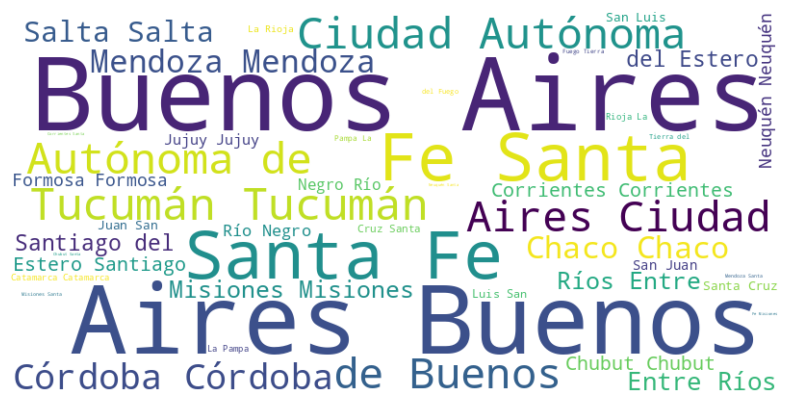

In [20]:
# Importar la librer√≠a wordcloud
from wordcloud import WordCloud

# Combinar los valores de una columna de texto en una sola cadena
text = ' '.join(df['provincia_nombre'].astype(str).tolist()) # Elegir la columna de texto deseada

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#Siendo Buenos Aires la provincia que m√°s homicidios ha tenido en los a√±os 2017-2023,
#pasaremos a focalizarnos en las caracter√≠sticas del delito de Homicidio Doloso en dicha jurisdiccion
#primero creare un nuevo df donde unicamente aquellos registros en los que 'provincia_nombre' == Buenos Aires y 'tipo-_persona' == 'V√≠ctima'. y se llame df_BA

df_BA = df_2[(df_2['provincia_nombre'] == 'Buenos Aires') & (df_2['tipo_persona'] == 'V√≠ctima')]
df_BA

id_hecho                    tipo_hecho_segun_victima  \
3462      14097                                    HD Var√≥n   
3465      14098  HD Mujer Cis Trans Travesti-Otro homicidio   
3466      14098  HD Mujer Cis Trans Travesti-Otro homicidio   
3468      14099                                    HD Var√≥n   
3469      14100                                    HD Var√≥n   
...         ...                                         ...   
34018     33769       HD Mujer Cis Trans Travesti-Femicidio   
34019     33820                                    HD Var√≥n   
34022     33821  HD Mujer Cis Trans Travesti-Otro homicidio   
34023     33822                                    HD Var√≥n   
34025     33823                                    HD Var√≥n   

                tipo_persona_id tipo_persona  cant_inculpados  cant_victimas  \
3462   V√≠ctima idRegistro 14852      V√≠ctima                1              1   
3465   V√≠ctima idRegistro 14853      V√≠ctima                1              2   
3466   V√≠ctima idRegistro 14854      V√≠ctima                1              2   
3468   V√≠ctima idRegistro 14855      V√≠ctima                1              1   
3469   V√≠ctima idRegistro 14856      V√≠ctima                1              1   
...                         ...          ...              ...            ...   
34018  V√≠ctima idRegistro 35944      V√≠ctima                3              3   
34019  V√≠ctima idRegistro 35994      V√≠ctima                1              1   
34022  V√≠ctima idRegistro 35995      V√≠ctima                1              1   
34023  V√≠ctima idRegistro 35996      V√≠ctima                1              1   
34025  V√≠ctima idRegistro 35997      V√≠ctima                2              1   

      federal  provincia_id provincia_nombre  departamento_id  ...  \
3462       No             6     Buenos Aires             6410  ...   
3465       No             6     Buenos Aires             6427  ...   
3466       No             6     Buenos Aires             6427  ...   
3468       No             6     Buenos Aires             6441  ...   
3469       No             6     Buenos Aires             6875  ...   
...       ...           ...              ...              ...  ...   
34018      No             6     Buenos Aires             6882  ...   
34019      No             6     Buenos Aires             6490  ...   
34022      No             6     Buenos Aires             6427  ...   
34023      No             6     Buenos Aires             6623  ...   
34025      No             6     Buenos Aires             6371  ...   

      victima_sexo victima_identidad_genero victima_identidad_genero_otro  \
3462     Masculino                    Var√≥n                           NaN   
3465     Masculino                    Var√≥n                           NaN   
3466      Femenino                    Mujer                           NaN   
3468     Masculino                    Var√≥n                           NaN   
3469     Masculino                    Var√≥n                           NaN   
...            ...                      ...                           ...   
34018     Femenino                    Mujer                           NaN   
34019    Masculino                    Var√≥n                           NaN   
34022     Femenino                    Mujer                           NaN   
34023    Masculino                    Var√≥n                           NaN   
34025    Masculino                    Var√≥n                           NaN   

       victima_tramo_edad victima_18_a√±os_o_mas      victima_clase  \
3462                35-39                    S√≠              Civil   
3465                20-24                    S√≠  Sin determinaci√≥n   
3466                25-29                    S√≠  Sin determinaci√≥n   
3468                30-34                    S√≠              Civil   
3469                45-49                    S√≠              Civil   
...                   ...                   ...               

In [22]:
df_BA.shape

(6223, 39)

Vemos que el data set ha quedado nuevamente reducido:

*menos registros:*

de 15.522 homicidios en el pa√≠s, solo pasar√© a analizar los 6.223 ocurridos en Buenos Aires. mismos atributos para el an√°lisis.

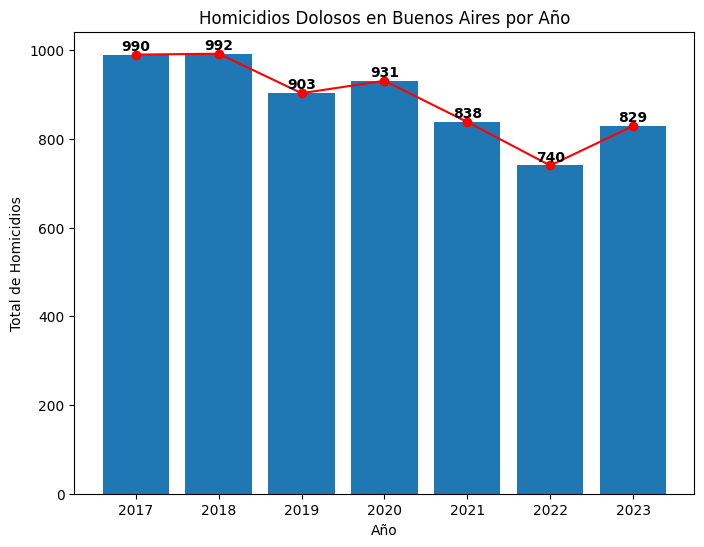

In [23]:
# agrupar los homicidios de Buenos Aires por a√±o (recordemos que el per√≠odo es 2017 a 2023)
homicides_by_year = df_BA.groupby('anio')['id_hecho'].count().reset_index()

# creacion gr√°fico de barras
plt.figure(figsize=(8, 6))
plt.bar(homicides_by_year['anio'], homicides_by_year['id_hecho'])
plt.xlabel('A√±o')
plt.ylabel('Total de Homicidios')
plt.title('Homicidios Dolosos en Buenos Aires por A√±o')
plt.xticks(homicides_by_year['anio'])  # Set x-axis ticks to show all years

# agregar valores en cada columna
for i, v in enumerate(homicides_by_year['id_hecho']):
    plt.text(homicides_by_year['anio'][i], v + 10, str(v),
             ha='center', fontweight='bold')  # Adjust v + 10 for vertical position

# linea roja punteada a√±o a a√±o
plt.plot(homicides_by_year['anio'], homicides_by_year['id_hecho'],
         color='red', marker='o', linestyle='-')
plt.show()

Este gr√°fico es √∫til para comunicar de manera clara y concisa la disminuci√≥n interanual de los Homicidios Dolosos por a√±o en la Provincia de Buenos Aires (excepto en 2020 y 2023).
Veamos ahora en qu√© Municipios de la Provincia de Buenos Aires ocurrieron los homicidios del a√±o 2023.



In [24]:
# Agrupar los homicidios por a√±o y por departamento (en la Pcia. de Buenos Aires se llaman Municipios), y luego hacer un distinct count
department_counts_by_year = df_BA.groupby(['anio', 'departamento_nombre'])['id_hecho'].count().reset_index()

# Pivoter la tabla para tener los a√±os como columna y los municipios como filas
table = department_counts_by_year.pivot(index='departamento_nombre', columns='anio', values='id_hecho')

# convertir los valores NaN con 0 y convertirlos al tipo enteros
table = table.fillna(0).astype(int)  # Convert to integers here

# calcular el total por departamento
table['Total'] = table.sum(axis=1)  # Sum across columns (years)

# Ordenar de mayor a menos de acuerdo al valor de la columna 'Total'
table = table.sort_values(by='Total', ascending=False)

# Mostrar la tabla con los resultados
print(table)

anio                 2017  2018  2019  2020  2021  2022  2023  Total
departamento_nombre                                                 
La Matanza            155   148   143   154   127   126   143    996
Moreno                 52    67    66    50    48    34    50    367
Lomas de Zamora        65    50    51    42    33    35    41    317
Quilmes                50    59    45    42    38    31    40    305
General Pueyrred√≥n     36    48    46    33    39    32    43    277
...                   ...   ...   ...   ...   ...   ...   ...    ...
Lezama                  0     0     0     0     1     0     0      1
Saavedra                0     0     0     0     0     0     1      1
Salliquel√≥              0     0     0     0     1     0     0      1
Rivadavia               0     0     0     1     0     0     0      1
Tornquist               0     0     0     0     0     1     0      1

[125 rows x 8 columns]


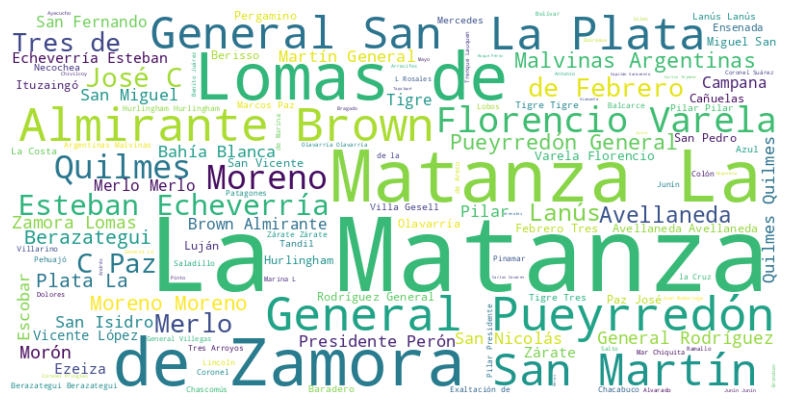

In [25]:
# Importar la librer√≠a wordcloud
from wordcloud import WordCloud

# Filter the DataFrame for 'Buenos Aires' and 'V√≠ctima'
df_BA = df_2[(df_2['provincia_nombre'] == 'Buenos Aires') & (df_2['tipo_persona'] == 'V√≠ctima')]

# Combinar los valores de una columna de texto en una sola cadena
text = ' '.join(df_BA['departamento_nombre'].astype(str).tolist()) # Elegir la columna de texto deseada

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

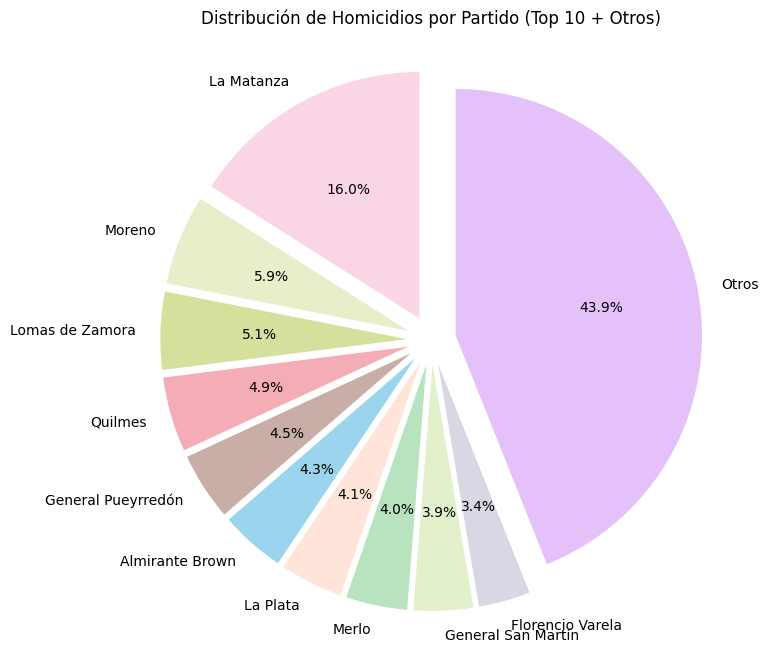

In [26]:
#considerando los primeros 10 partidos con m√°s Homicidios dolosos de la Provincia,
#veamos como es la proporcion de los mismos, en el total del territorio bonaerense:

import matplotlib.pyplot as plt

# Obtener el top 10 de los municipios con sus totales
top_10_departments = table.head(10)

# Calcular la suma de totales de los restantes municipios
other_departments_count = table.iloc[10:, :].sum().sum()  # conteo desde la fila numero 11 en adelante

# Crear etiquetas (labels) para el grafico de torta
labels = top_10_departments.index.tolist() + ['Otros']  # Department names + 'Otros'

# Crear la data (labels) para el grafico de torta
sizes = top_10_departments.sum(axis=1).tolist() + [other_departments_count]  # Counts + 'Otros' count

# Definir color de la paleta con 11  colores distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']

# crear el grafico de torta con los colores
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Reutilizar la tupla explode
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode) #Fixed indentation
plt.title('Distribuci√≥n de Homicidios por Partido (Top 10 + Otros)')
plt.show()

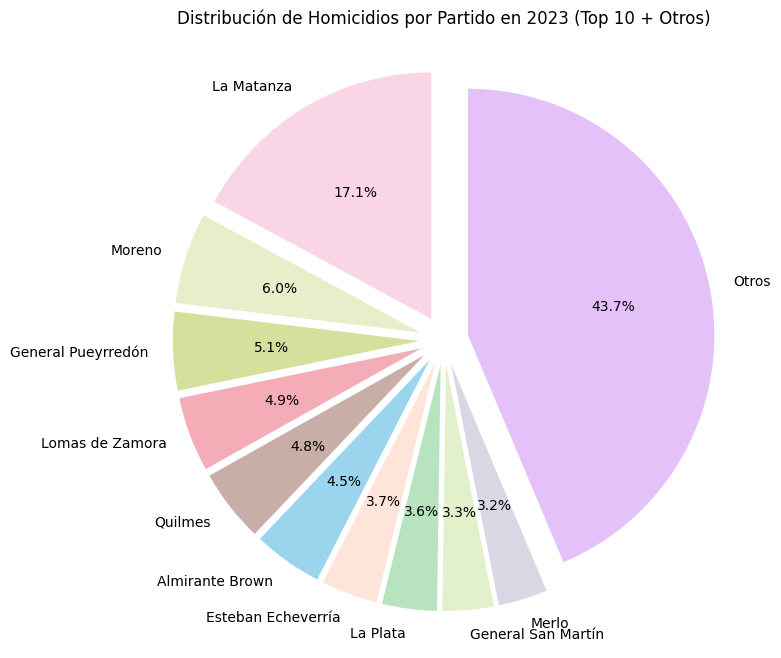

In [27]:
#veamos √∫nicamente el a√±o 2023 para ver si hay algun cambio sustancial en la proporcion de los Homicidios segun Partido:

import matplotlib.pyplot as plt

# filtar la tabla al a√±o 2023
table_2023 = table[[2023]]  # Select only the column for 2023

# obtener top 10 de municipos y sus totales para 2023
top_10_departments_2023 = table_2023.sort_values(by=2023, ascending=False).head(10)

# calcular la suma de los totales para los otrs municipios en 2023
other_departments_count_2023 = table_2023.iloc[10:, :].sum().sum()

# Crear etiquetas para grafico de torta
labels_2023 = top_10_departments_2023.index.tolist() + ['Otros']

# Crear data para el grafico de torta
sizes_2023 = top_10_departments_2023[2023].tolist() + [other_departments_count_2023]

# Definir colores de la paleta con 11 colores distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']

# crear grafico de torta con los colores de la paleta
plt.figure(figsize=(8, 8))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Reutilizar la tupla explode
plt.pie(sizes_2023, labels=labels_2023, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode) #Fixed indentation
plt.title('Distribuci√≥n de Homicidios por Partido en 2023 (Top 10 + Otros)')
plt.show()

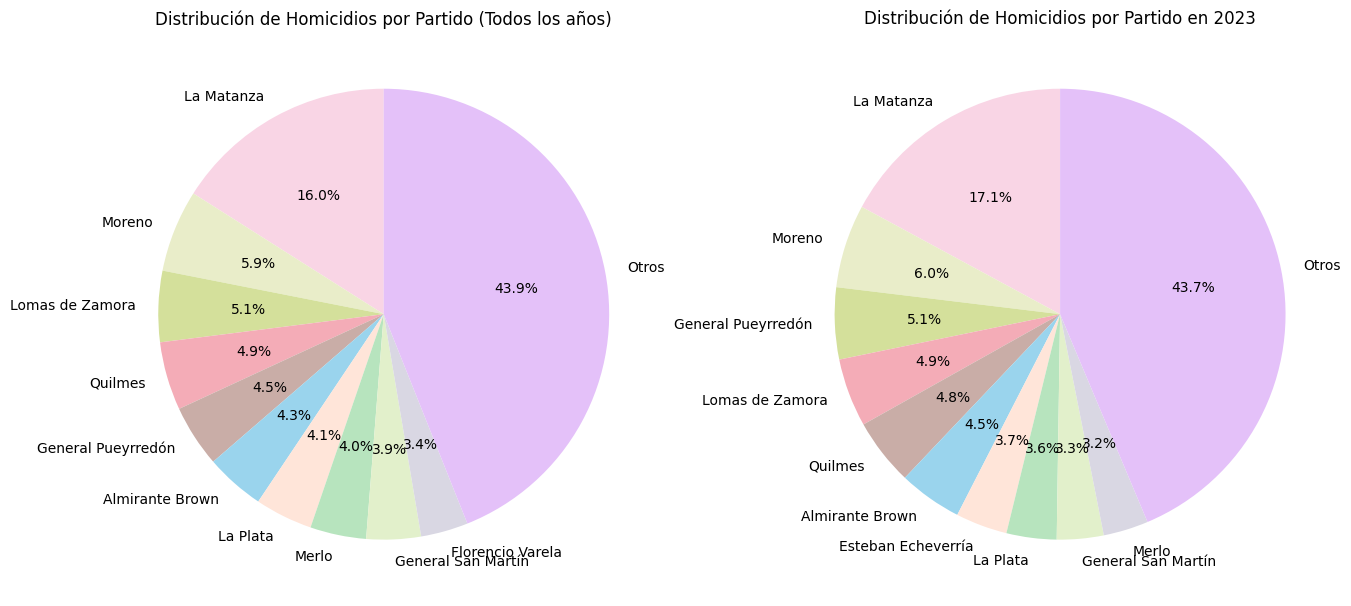

In [28]:
#veamolos uno al lado del otro para tener una mejor visualizaci√≥n:

import matplotlib.pyplot as plt

# pie total de los a√±os 2017-2023

# obttener top 10 y totales
top_10_departments = table.head(10)  # seleccionar las primeras 10 filas

# Calcular la suma de los dem√°s departamentos
other_departments_count = table.iloc[10:, :].sum().sum()  # Sum cuenta desde la fila 11 en adelante

# Crear etiquetas para el grafico
labels = top_10_departments.index.tolist() + ['Otros']  # nombre de departamentos + 'Otros'

# crear data para el grafico de torta
sizes = top_10_departments.sum(axis=1).tolist() + [other_departments_count]  # Counts + 'Otros' count

# Definir colores de la paleta con 11 colores distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']  # Add more colors if needed

#pie del a√±o 2023
# filtrar la tabla para el a√±o 2023
table_2023 = table[[2023]]  # seleccionar unicamente el a√±o 2023

# obtener top 10 y contarlos para 2023
top_10_departments_2023 = table_2023.sort_values(by=2023, ascending=False).head(10)

# calcular la suma de los conteos para los otros departamentos en 2023
other_departments_count_2023 = table_2023.iloc[10:, :].sum().sum()

# crear etiquetas
labels_2023 = top_10_departments_2023.index.tolist() + ['Otros']

# crear datapara el grafico
sizes_2023 = top_10_departments_2023[2023].tolist() + [other_departments_count_2023]

# definir paleta de colores con  11 colors distintos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']

# crear subplots para los 2 graficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Pie chart for all years
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('Distribuci√≥n de Homicidios por Partido (Todos los a√±os)')

# Pie chart for 2023
ax2.pie(sizes_2023, labels=labels_2023, colors=colors, autopct='%1.1f%%', startangle=90)
ax2.set_title('Distribuci√≥n de Homicidios por Partido en 2023')

plt.show()

# Femicidios

In [29]:
#pasemos a analizar el data set de acuerdo al G√©nero de la V√≠ctima, continuando el analisis dentro de la Provincia de Buenos Aires.
homicides_by_year_sex = df_BA.groupby(['anio', 'victima_sexo'])['id_hecho'].count().reset_index()

# renombrar las columnas para mejor comprensi√≥n
homicides_by_year_sex = homicides_by_year_sex.rename(columns={'id_hecho': 'total_homicidios'})

# Print resultados
print(homicides_by_year_sex)

    anio victima_sexo  total_homicidios
0   2017     Femenino               148
1   2017    Masculino               842
2   2018     Femenino               145
3   2018    Masculino               847
4   2019     Femenino               147
5   2019    Masculino               756
6   2020     Femenino               139
7   2020    Masculino               792
8   2021     Femenino               104
9   2021    Masculino               734
10  2022     Femenino               121
11  2022    Masculino               619
12  2023     Femenino               129
13  2023    Masculino               700


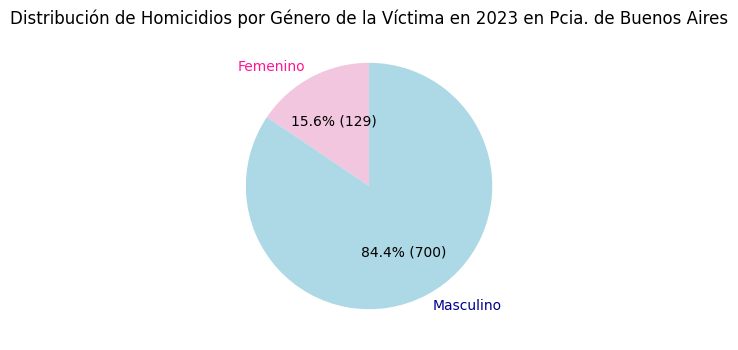

In [30]:
# filtar data para el a√±o 2023
data_2023 = homicides_by_year_sex[homicides_by_year_sex['anio'] == 2023]

# obtener etiquetas y valores
labels = data_2023['victima_sexo']
values = data_2023['total_homicidios']

import matplotlib.pyplot as plt

#crear grafico
plt.figure(figsize=(4, 4))

# definir colores para slices y etiquetas
colors = ['#f2c6de', '#add8e6']  # Pink pastel para femenina, y Light blue pastel para masculinos

# definir colores para etiquetas
label_colors = ['#FF1493', '#00008B']  # usando hex codes para rosa y azul

# crear grafico con los colores y etiquetas elegidas
wedges, texts, autotexts = plt.pie(
    values,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f'{pct:.1f}% ({int(pct/100.*sum(values))})',
    startangle=90,
)

# Set label colors  usando colores indicados
for text, label_color in zip(texts, label_colors):
    text.set_color(label_color)

plt.title('Distribuci√≥n de Homicidios por G√©nero de la V√≠ctima en 2023 en Pcia. de Buenos Aires')
plt.show()

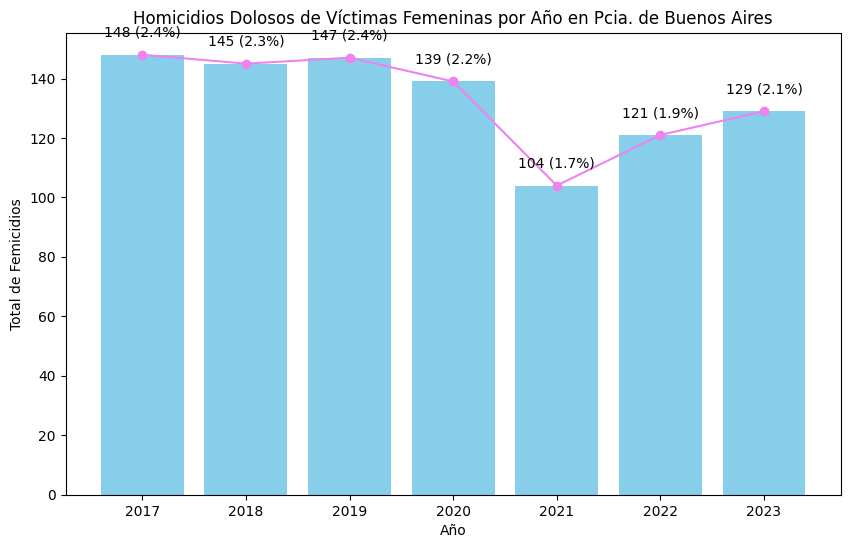

In [31]:
#analizaremos ahora la evoluci√≥n de los Femicidios en la provincia de Buenos Aires

# filtar data para 'victima_sexo' == "Femenino"
female_homicides = homicides_by_year_sex[homicides_by_year_sex['victima_sexo'] == "Femenino"]

# obtener total homicidios por a√±o
total_homicides_all_years = homicides_by_year_sex['total_homicidios'].sum()

# crear grafico torta
plt.figure(figsize=(10, 6))
bars = plt.bar(female_homicides['anio'], female_homicides['total_homicidios'], color='skyblue')
plt.xlabel('A√±o')
plt.ylabel('Total de Femicidios')
plt.title('Homicidios Dolosos de V√≠ctimas Femeninas por A√±o en Pcia. de Buenos Aires')
plt.xticks(female_homicides['anio'])

# agregar porcentaje en cima de cada colmna
for bar in bars:
    height = bar.get_height()
    percentage = (height / total_homicides_all_years) * 100  # Calculate percentage
    label_text = f'{int(height)} ({percentage:.1f}%)'  # Format label
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, label_text,
             ha='center', va='bottom')

#conectar las columnas con linea
plt.plot(female_homicides['anio'], female_homicides['total_homicidios'],
         color='violet', marker='o', linestyle='-')

plt.show()

In [32]:
#Analicemos los femicidios por Partido en la Provincia de Buenos Aires
# filtrar data para victimas femeninas
female_homicides_all_years = df_BA[df_BA['victima_sexo'] == "Femenino"]

# agrupar por departamento y contar homicidios
department_counts_female = female_homicides_all_years.groupby('departamento_nombre')['id_hecho'].count().reset_index()

# renombrar la columna del conteo
department_counts_female = department_counts_female.rename(columns={'id_hecho': 'Total'})

# ordenar de acuerdo al Total y en orden  descendente
department_counts_female = department_counts_female.sort_values(by='Total', ascending=False)

# mostrar tabla
print(department_counts_female)

   departamento_nombre  Total
50          La Matanza     85
51            La Plata     54
57     Lomas de Zamora     50
40  General Pueyrred√≥n     46
63              Moreno     43
..                 ...    ...
77            Saavedra      1
74           Rivadavia      1
89            Tapalqu√©      1
93         Tres Lomas       1
97           Villarino      1

[99 rows x 2 columns]


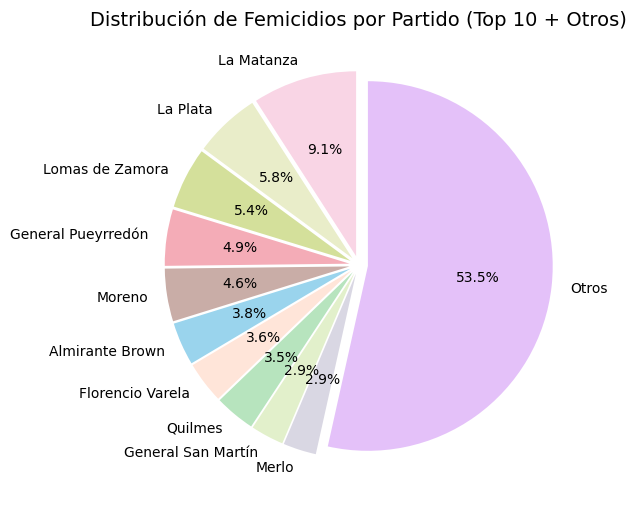

In [33]:
#top 10 de femicidios por partido

# obtener top 10 por departamento y contarlos
top_10_departments = department_counts_female.head(10)

# calcular la suma de los conteos para los otros departamentos
other_departments_count = department_counts_female.iloc[10:]['Total'].sum()

# crear etiquetas
labels = top_10_departments['departamento_nombre'].tolist() + ['Otros']

# Crear data
sizes = top_10_departments['Total'].tolist() + [other_departments_count]

# Definir 11 colores distitnos
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
                  '#9ad4ed', '#ffe5d9', '#b7e4be', '#e2f0cb', '#d9d7e3',
                  '#e4c1f9']
# crear el grafico
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', explode=[0.05] * len(sizes), startangle=90)
plt.title('Distribuci√≥n de Femicidios por Partido (Top 10 + Otros)', fontsize=14)
plt.show()

Vemos que el lugar donde m√°s femicidios hay en la Provincia de Buenos Aires, coincide con el Municipio donde m√°s homicidios se cometen.

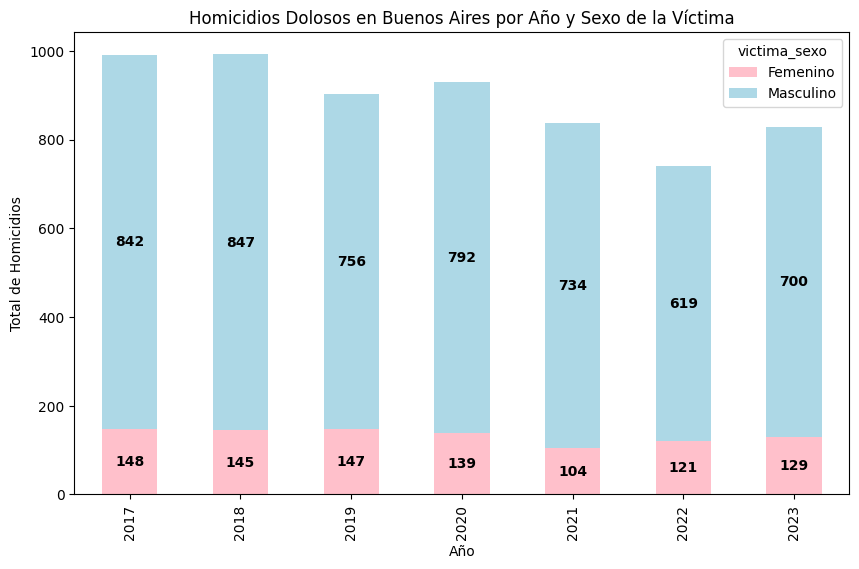

In [34]:
# Analisis de Homicidios Dolosos en Buenos Aires por A√±o y Sexo de la V√≠ctima
homicides_by_year_sex = df_BA.groupby(['anio', 'victima_sexo'])['id_hecho'].count().reset_index()

# Pivotear la tabla para tener los a√±os como columna y sexo de las victimas como filas
table_stacked = homicides_by_year_sex.pivot(index='anio', columns='victima_sexo', values='id_hecho')

# crear grafico de columnas apiladas
ax = table_stacked.plot(kind='bar', stacked=True, figsize=(10, 6), color={'Femenino': 'pink', 'Masculino': 'lightblue'})
plt.xlabel('A√±o')
plt.ylabel('Total de Homicidios')
plt.title('Homicidios Dolosos en Buenos Aires por A√±o y Sexo de la V√≠ctima')

# conectar el total de homicidios con una linea roja y puntos rojos
total_homicides_by_year = table_stacked.sum(axis=1)  # Calculate total por a√±o
plt.plot(total_homicides_by_year.index, total_homicides_by_year.values,
         color='red', marker='o', linestyle='-')

# agregar conteo de etiquetas Add count labels to each segment
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x() + width / 2
    y = bar.get_y() + height / 2
    label_text = f'{int(height)}'  # Format label text
    ax.text(x, y, label_text, ha='center', va='center', fontweight='bold')  # Add label

plt.show()

**Histogramas**

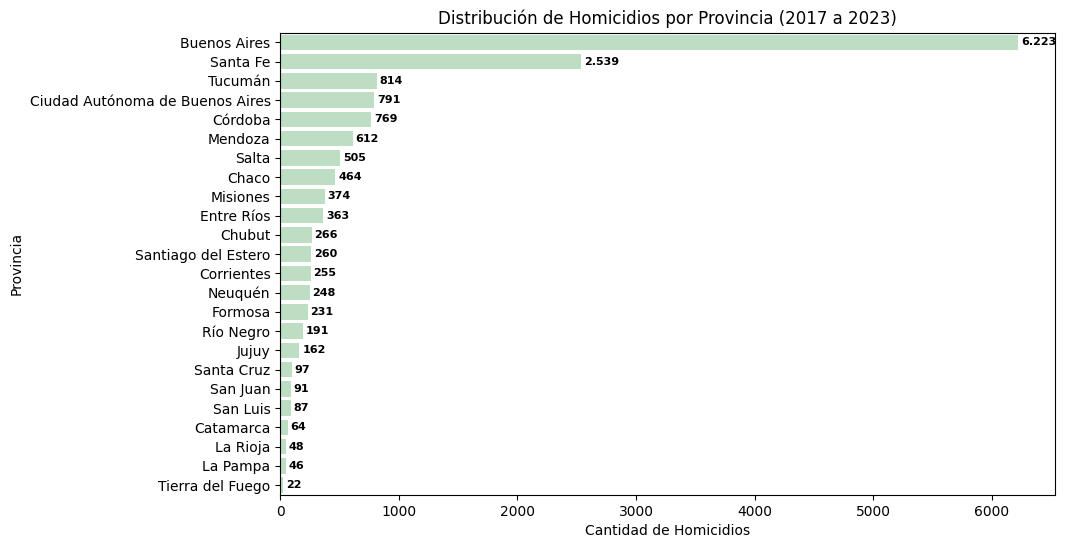

In [35]:
#volvamos al data set original (df) para analizar d√≥nde se concentran los datos de acuerdo a la Provincia:

# 'df' es el data set de todas las provincias
# fitrar el  DataFrame  para mostrar unicamente victimas
victims_df = df[df['tipo_persona'] == 'V√≠ctima']

# calcular conteo de provincias basado en el dataframe filtrado
province_counts = victims_df['provincia_nombre'].value_counts()

# funcion para dar formato de contabilidad
def format_number(num):
    return "{:,}".format(num).replace(",", ".")  # reemplaza coma a formato contabilidad

# crear barras horizontales con los colores elegidos
plt.figure(figsize=(10, 6))
ax = sns.barplot(y=province_counts.index, x=province_counts.values, color='#b7e4be', orient='h')  # Set bar color and orientation
plt.title('Distribuci√≥n de Homicidios por Provincia (2017 a 2023)')
plt.ylabel('Provincia')
plt.xlabel('Cantidad de Homicidios')

# agregar etiqueta con valores a cada barra en el formato de contabilidad
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: format_number(int(x)),  # Apply custom formatting function
                 label_type='edge',
                 padding=2,
                 color='black',
                 fontsize=8,  # Adjust font size
                 fontweight='bold')  # Make font bold

plt.show()

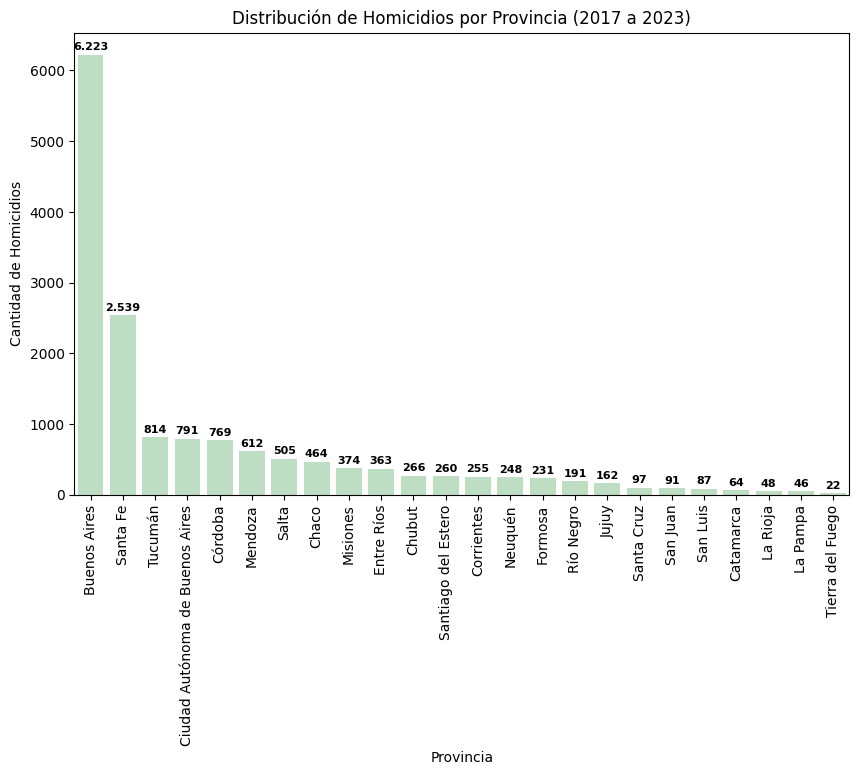

In [36]:
#volvamos al data set original (df) para analizar d√≥nde se concentran los datos de acuerdo a la Provincia:

# 'df' es el data set de todas las provincias
# Fitrar solo victimas
victims_df = df[df['tipo_persona'] == 'V√≠ctima']

# calcular provincias y contarlas
province_counts = victims_df['provincia_nombre'].value_counts()

# agregar etiquetas a cada columna
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2, color='black')

# formato contabilidad
def format_number(num):
    return "{:,}".format(num).replace(",", ".")  # Rreemplaza coma por punto

# crea grafico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=province_counts.index, y=province_counts.values, color='#b7e4be')  # Set bar color
plt.xticks(rotation=90, ha='center')  # Rotate and center x-axis labels
plt.title('Distribuci√≥n de Homicidios por Provincia (2017 a 2023)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Homicidios')

# agregar etiqueta  a cada barra
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: format_number(int(x)),  # Apply custom formatting function
                 label_type='edge',
                 padding=2,
                 color='black',
                 fontsize=8,  # Adjust font size
                 fontweight='bold')  # Make font bold

plt.show()

Porcentaje de Homicidios por Provincia (Solo V√≠ctimas):
 provincia_nombre
Buenos Aires                       40.09
Santa Fe                           16.36
Tucum√°n                             5.24
Ciudad Aut√≥noma de Buenos Aires     5.10
C√≥rdoba                             4.95
Mendoza                             3.94
Salta                               3.25
Chaco                               2.99
Misiones                            2.41
Entre R√≠os                          2.34
Chubut                              1.71
Santiago del Estero                 1.68
Corrientes                          1.64
Neuqu√©n                             1.60
Formosa                             1.49
R√≠o Negro                           1.23
Jujuy                               1.04
Santa Cruz                          0.62
San Juan                            0.59
San Luis                            0.56
Catamarca                           0.41
La Rioja                            0.31
La Pampa         

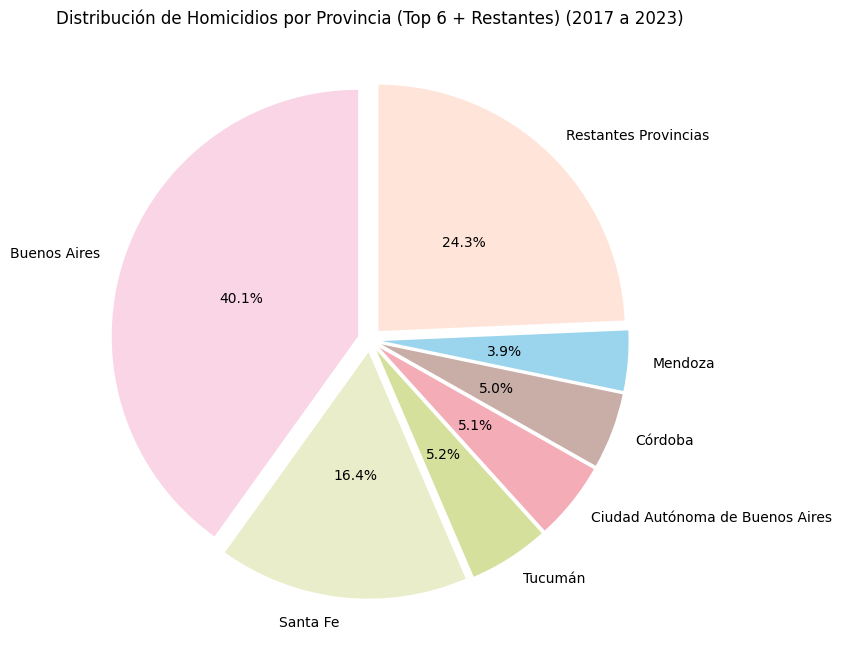

In [37]:
#Analisis porcentual por provincias
# calcular conteo de provincias basado en el data set de victimas
province_counts = victims_df['provincia_nombre'].value_counts()

# calculo porcettajes por provicna
province_percentages = (province_counts / province_counts.sum() * 100).round(2)

# Print % por province
print("Porcentaje de Homicidios por Provincia (Solo V√≠ctimas):\n", province_percentages)

# Crear grafico para top 6  + 'Restantes Provincias'
top_6_provinces = province_percentages.head(6)
other_provinces_percentage = province_percentages.iloc[6:].sum()

pie_chart_data = pd.concat([top_6_provinces, pd.Series([other_provinces_percentage], index=['Restantes Provincias'])])

# definir colores
colors = ['#f9d5e5', '#e9edc9', '#d4e09b', '#f4acb7', '#c9ada7',
          '#9ad4ed', '#ffe5d9']  # Use only 7 colors for 7 slices

plt.figure(figsize=(8, 8))
# aplicar colores y formato indicados
plt.pie(x=pie_chart_data, autopct="%.1f%%", labels=pie_chart_data.index,
        explode=[0.05] * len(pie_chart_data), pctdistance=0.5, startangle=90,
        colors=colors)  # Add colors parameter
plt.title('Distribuci√≥n de Homicidios por Provincia (Top 6 + Restantes) (2017 a 2023)')
plt.show()

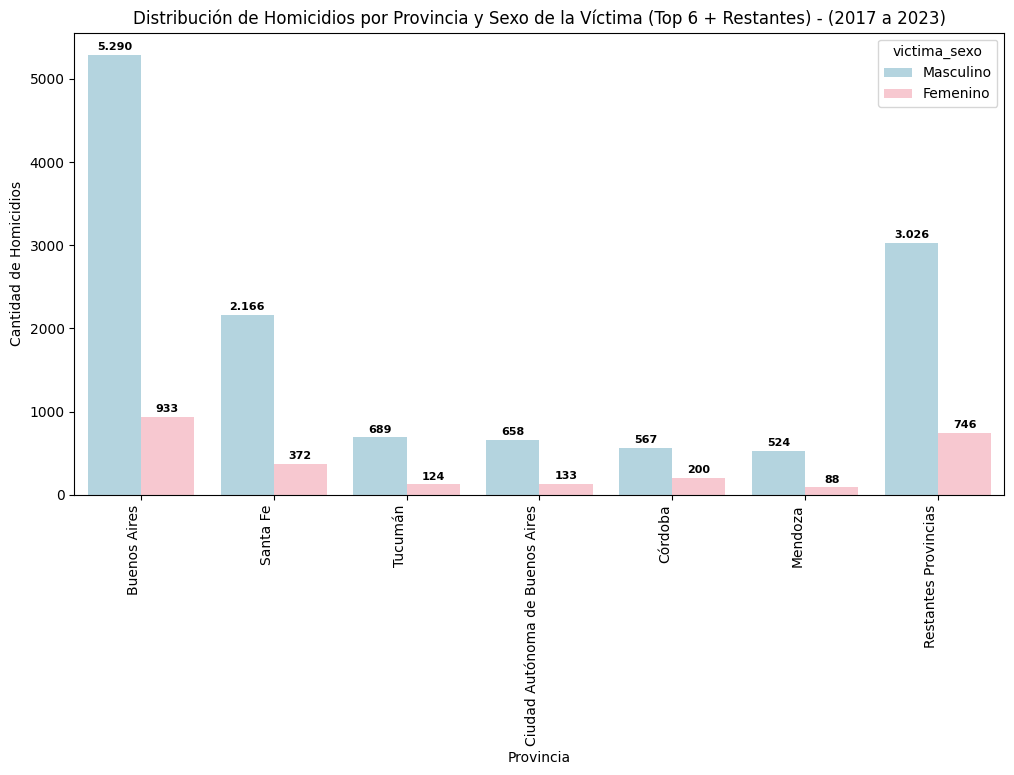

In [38]:
# continuando con el data set basado en vicitmas unicamente

# calcular provincias
province_counts = victims_df['provincia_nombre'].value_counts()

#  agrupar provincias y sexo de victima y contar los homicidios
province_sex_counts = victims_df.groupby(['provincia_nombre', 'victima_sexo'])['id_hecho'].count().reset_index()

# renombrar la colummna
province_sex_counts = province_sex_counts.rename(columns={'id_hecho': 'total_homicidios'})

# Calcular total homicidios por pcia
total_homicides_by_province = province_sex_counts.groupby('provincia_nombre')['total_homicidios'].sum().sort_values(ascending=False)

#  top 6 pcias
top_6_provinces = total_homicides_by_province.head(6).index.tolist()

# reemplazar con el valor "Restantes Provincias"
province_sex_counts['provincia_nombre'] = province_sex_counts['provincia_nombre'].apply(lambda x: x if x in top_6_provinces else 'Restantes Provincias')

# agrupar luego de renombrar las pcias
province_sex_counts = province_sex_counts.groupby(['provincia_nombre', 'victima_sexo'])['total_homicidios'].sum().reset_index()

# Filter out "Sin determinar" from province_sex_counts
province_sex_counts = province_sex_counts[province_sex_counts['victima_sexo'] != 'Sin determinar']

# separador de contabilidad
def format_number(num):
    return "{:,}".format(num).replace(",", ".")  # Replace commas with periods for accounting format

# ordenar por province_sex_counts por total_homicidios  en orden descendente
province_sex_counts = province_sex_counts.sort_values(by=['total_homicidios'], ascending=False)

# Create a custom order for the x-axis categories
categories_order = province_sex_counts['provincia_nombre'].unique().tolist()
categories_order.remove('Restantes Provincias')  # Remove and append to the end
categories_order.append('Restantes Provincias')

# Create the bar plot with custom colors, hue, and order
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
ax = sns.barplot(
    x='provincia_nombre',
    y='total_homicidios',
    hue='victima_sexo',
    data=province_sex_counts,
    palette={'Femenino': 'pink', 'Masculino': 'lightblue'},  # Custom color palette
    order=categories_order  # Set the order of x-axis categories
)
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.title('Distribuci√≥n de Homicidios por Provincia y Sexo de la V√≠ctima (Top 6 + Restantes) - (2017 a 2023)')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de Homicidios')

# Add value labels to each bar with custom formatting
for container in ax.containers:
    ax.bar_label(container,
                 fmt=lambda x: format_number(int(x)),  # Apply custom formatting function
                 label_type='edge',
                 padding=2,
                 color='black',
                 fontsize=8,  # Adjust font size
                 fontweight='bold')  # Make font bold

plt.show()

**Series de Tiempo**

<ipython-input-40-e0725085d622>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])


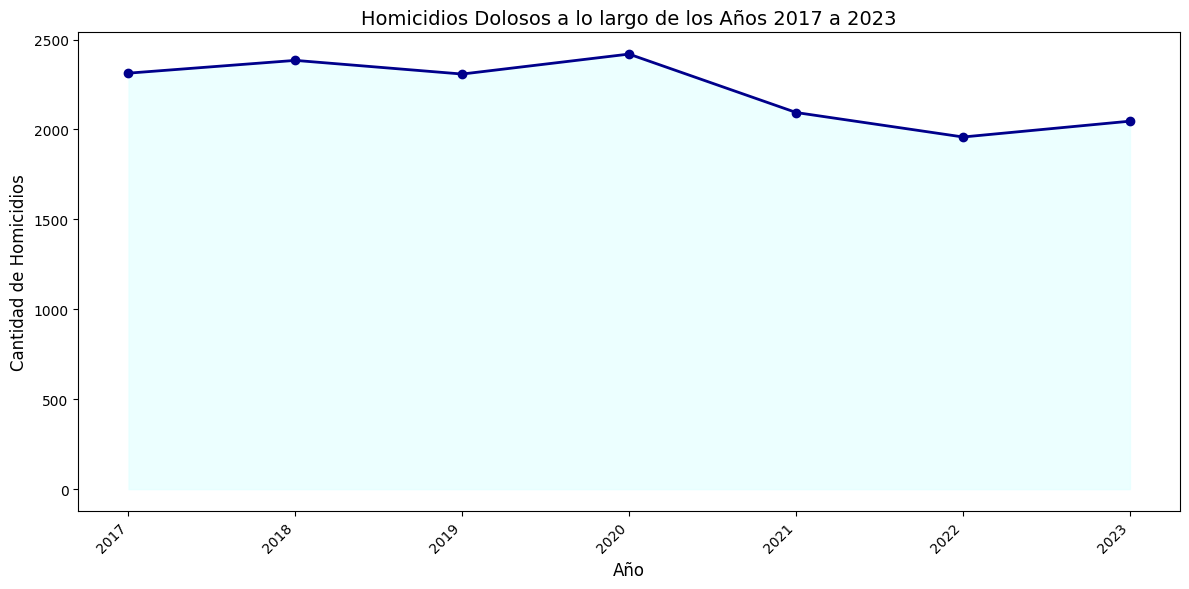

In [40]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker # This import was missing and is needed for mdates

# Convertir  'fecha_hecho' a formato datetime
victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])

# agrupar data por mes y contar homidicios segun vitimas
monthly_accidents = victims_df.groupby(victims_df['fecha_hecho'].dt.to_period('Y')).size()

# generar grafico de lineas
fig, ax = plt.subplots(figsize=(12, 6))

# Convert the index to datetime for plotting
x_values = monthly_accidents.index.to_timestamp()

plt.plot(x_values, monthly_accidents.values,
         color='darkblue', marker='o', linestyle='-', linewidth=2)  # Dark blue line, thicker, with markers
plt.fill_between(x_values, monthly_accidents.values,
                 color='lightcyan', alpha=0.6)  # Light cyan fill, semi-transparent

plt.title('Homicidios Dolosos a lo largo de los A√±os 2017 a 2023', fontsize=14)  # Larger title
plt.xlabel('A√±o', fontsize=12)  # Larger x-axis label
plt.ylabel('Cantidad de Homicidios', fontsize=12)  # Larger y-axis label

# Format x-axis ticks for better readability (show every year)
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Tick every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust spacing
plt.show()

<ipython-input-39-78585eb4339e>:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])
<ipython-input-39-78585eb4339e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])


NameError: name 'mdates' is not defined

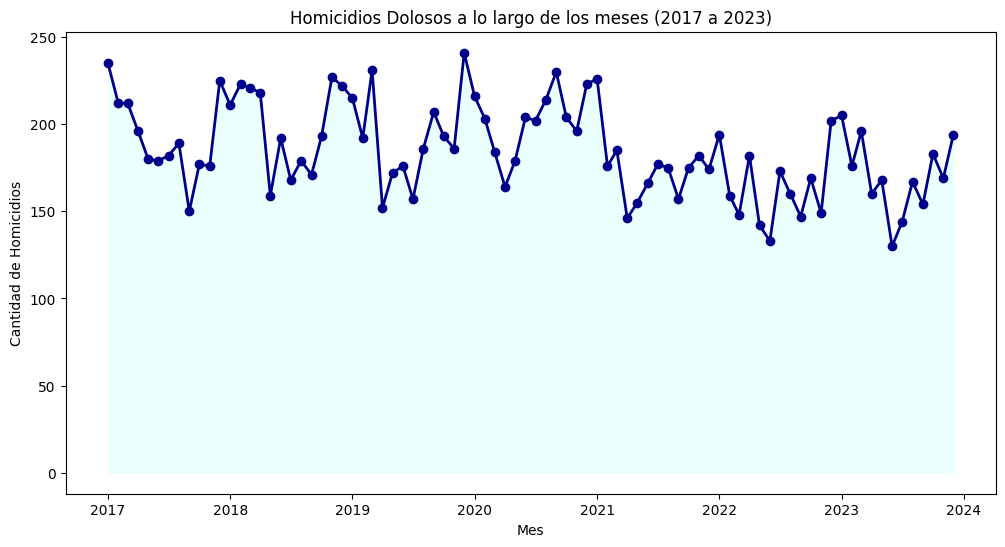

In [39]:
import matplotlib.dates as mpl_dates
# Convertir 'fecha_hecho' al formato datetime en el df_victims
victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])

# Agrupar mensualmente contando unicamente v√≠ctimas.
monthly_accidents = victims_df.groupby(victims_df['fecha_hecho'].dt.to_period('M')).size()

# Generar gr√°fico de l√≠neas con sombreado y l√≠nea personalizada
fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar tama√±o de la figura si es necesario

# Convertir el √≠ndice a datetime antes de graficar
x_values = monthly_accidents.index.to_timestamp()

plt.plot(x_values, monthly_accidents.values,
         color='darkblue', marker='o', linestyle='-', linewidth=2)  # L√≠nea azul oscuro, m√°s gruesa y con puntos
plt.fill_between(x_values, monthly_accidents.values,
                 color='lightcyan', alpha=0.6)  # Sombreado celeste pastel
plt.title('Homicidios Dolosos a lo largo de los meses (2017 a 2023)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Homicidios')


# Using MonthLocator and DateFormatter to control labels
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Etiqueta cada 6 meses
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # L√≠nea cada mes # Optional for gridlines
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de etiqueta


plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x si es necesario
plt.tight_layout()  # Ajustar espaciado
plt.show()

<ipython-input-41-13668e5fac9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])


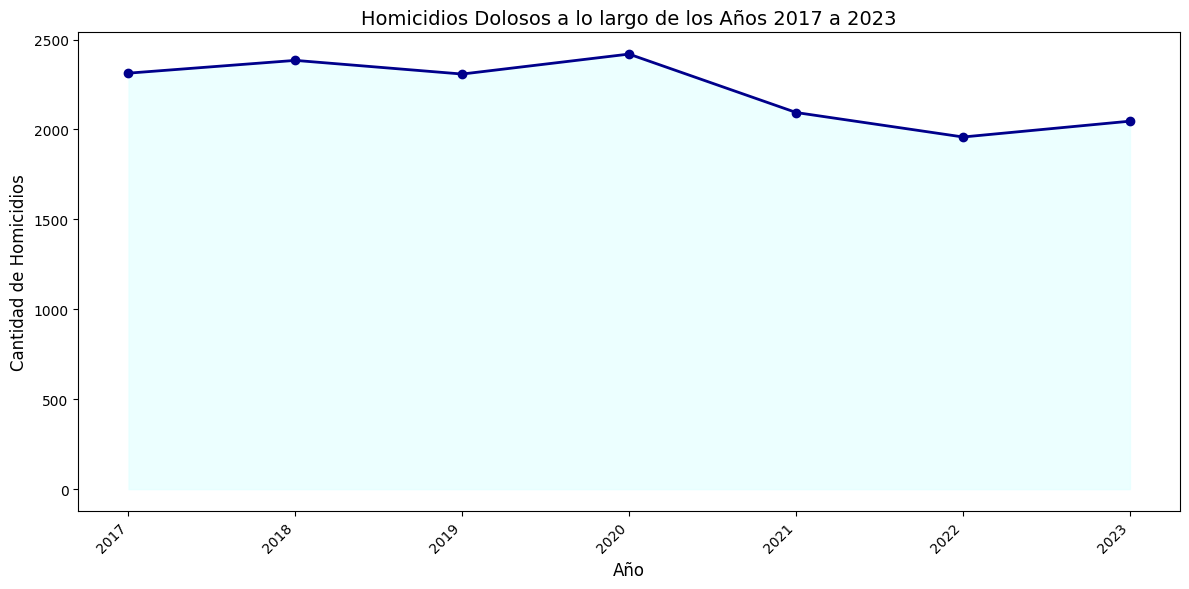

In [41]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# convertir  'fecha_hecho' a formato datetime
victims_df['fecha_hecho'] = pd.to_datetime(victims_df['fecha_hecho'])

# agrupar data por mes y contar homidicios segun vitimas
monthly_accidents = victims_df.groupby(victims_df['fecha_hecho'].dt.to_period('Y')).size()

# generar grafico de lineas
fig, ax = plt.subplots(figsize=(12, 6))

# Convert the index to datetime for plotting
x_values = monthly_accidents.index.to_timestamp()

plt.plot(x_values, monthly_accidents.values,
         color='darkblue', marker='o', linestyle='-', linewidth=2)  # Dark blue line, thicker, with markers
plt.fill_between(x_values, monthly_accidents.values,
                 color='lightcyan', alpha=0.6)  # Light cyan fill, semi-transparent

plt.title('Homicidios Dolosos a lo largo de los A√±os 2017 a 2023', fontsize=14)  # Larger title
plt.xlabel('A√±o', fontsize=12)  # Larger x-axis label
plt.ylabel('Cantidad de Homicidios', fontsize=12)  # Larger y-axis label

# Format x-axis ticks for better readability (show every year)
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # Tick every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust spacing
plt.show()

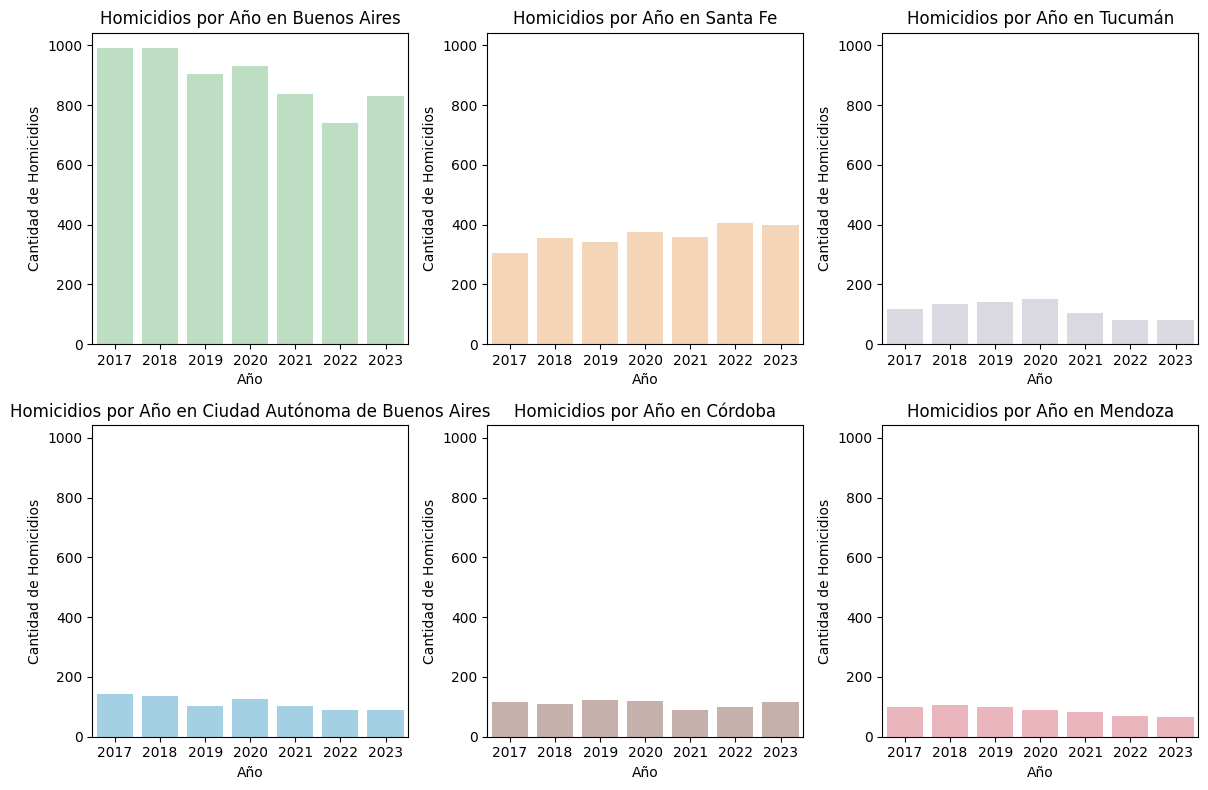

In [43]:
# agropar por provnicia y por a√±o y contar los homicidios (usando victims_df)
provincia_year_counts = victims_df.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()
provincia_year_counts = provincia_year_counts.rename(columns={'id_hecho': 'homicidios'})

# obtener top 6 de provincias con los valores maximos
top_6_provinces = provincia_year_counts.groupby('provincia_nombre')['homicidios'].sum().nlargest(6).index

# definir paleta
colors = {
    'Buenos Aires': '#b7e4be', #verde
    'Mendoza': '#f4acb7',  #naranja
    'Santa Fe': '#ffd5ae', #violeta
    'C√≥rdoba': '#c9ada7', #celeste
    'Tucum√°n': '#d9d7e3', #marr√≥n
    'Salta': '#ffe5d9', #coral
    'Ciudad Aut√≥noma de Buenos Aires': '#9ad4ed'
}

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))  # Adjust figsize as needed

# Get the maximum y-value across all provinces
max_homicidios = provincia_year_counts['homicidios'].max()

# Iterate through the top 6 provinces and create bar charts
for i, provincia in enumerate(top_6_provinces):
    provincia_data = provincia_year_counts[provincia_year_counts['provincia_nombre'] == provincia]
    row = i // 3  # Calculate row index
    col = i % 3   # Calculate column index
    ax = axes[row, col]  # Get the current subplot

    # Use the color from the palette for this province,
    # If the province is not in the colors dictionary, use a default color
    color = colors.get(provincia, 'grey') # Use 'grey' as default if the province is not found
    sns.barplot(x='anio', y='homicidios', data=provincia_data, ax=ax, color=color)

    ax.set_title(f'Homicidios por A√±o en {provincia}')
    ax.set_xlabel('A√±o')
    ax.set_ylabel('Cantidad de Homicidios')

    # Set the y-axis limits to be the same for all subplots
    ax.set_ylim(0, max_homicidios + 50)  # Add a small buffer for better visualization

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

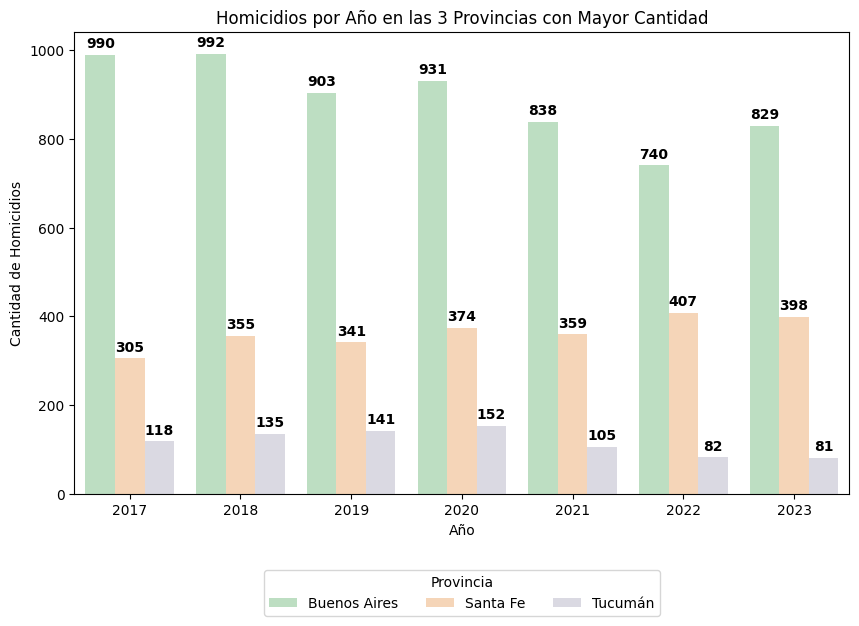

In [44]:
# Group data by provincia_nombre and year, then count homicides (using victims_df)
provincia_year_counts = victims_df.groupby(['provincia_nombre', 'anio'])['id_hecho'].count().reset_index()
provincia_year_counts = provincia_year_counts.rename(columns={'id_hecho': 'homicidios'})

# Get the top 3 provinces with the highest total homicides (using victims_df)
top_3_provinces = provincia_year_counts.groupby('provincia_nombre')['homicidios'].sum().nlargest(3).index

# Filter data for the top 3 provinces
top_3_data = provincia_year_counts[provincia_year_counts['provincia_nombre'].isin(top_3_provinces)]

colors = {
    'Buenos Aires': '#b7e4be',
    'Mendoza': '#f4acb7',
    'Santa Fe': '#ffd5ae',
    'C√≥rdoba': '#c9ada7',
    'Tucum√°n': '#d9d7e3',
    'Salta': '#ffe5d9',
    'Ciudad Aut√≥noma de Buenos Aires': '#9ad4ed'
}

# Get the colors for the top 3 provinces
top_3_colors = [colors[province] for province in top_3_provinces]


# Create the grouped bar chart using seaborn with custom colors
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
ax = sns.barplot(x='anio', y='homicidios', hue='provincia_nombre', data=top_3_data, palette=top_3_colors)  # Use palette argument

plt.title('Homicidios por A√±o en las 3 Provincias con Mayor Cantidad')
plt.xlabel('A√±o')
plt.ylabel('Cantidad de Homicidios')

# Move legend to horizontal position below the chart
plt.legend(title='Provincia', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Add total values above each column in bold
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 10,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.show()

### Transformaciones previas al an√°lisis Bivariado Edad¬†√ó¬†G√©nero  
*(Provincia de Buenos Aires)*

| Paso | Qu√© hice | Motivo |
|------|----------|--------|
| **1¬†‚Äì Auditor√≠a de la variable** | Inspeccion√© los valores √∫nicos de `victima_tramo_edad` y hall√©:<br>‚Ä¢ Rangos v√°lidos: `4‚ÄØo‚ÄØmenos`, `15‚Äë19`, `20‚Äë24`, ‚Ä¶, `90‚ÄØy‚ÄØm√°s`.<br>‚Ä¢ Valores err√≥neos: `41913`, `45905`.<br>‚Ä¢ Etiquetas sin dato: `No corresponde`, `Sin determinar`. | Saber qu√© limpiar antes de cruzar con g√©nero. |
| **2¬†‚Äì Asignaci√≥n de valores medios** | Defin√≠ `age_mapping` para mapear cada tramo a su edad promedio:<br>`'15‚Äë19'‚Üí17`, `'20‚Äë24'‚Üí22`, ‚Ä¶, `'90‚ÄØy‚ÄØm√°s'‚Üí92`. | Convertir la edad de categ√≥rica a num√©rica continua. |
| **3¬†‚Äì Filtrado de casos v√°lidos** | Gener√© `filtered_df` manteniendo solo las filas cuyo rango est√© en `age_ranges`. | Excluir outliers y etiquetas sin dato que distorsionan el an√°lisis. |
| **4¬†‚Äì Reemplazo de texto por n√∫mero** | Apliqu√© `.map(age_mapping)` sobre `victima_tramo_edad`, sustituyendo el texto por la edad media asignada. | Obtener una columna **edad num√©rica** (`Int64`) lista para el cruce con `victima_genero`. |

> Tras estos pasos la edad queda expresada en valores enteros, sin inconsistencias, y lista para el an√°lisis bivariado con el g√©nero de la v√≠ctima.


In [45]:
#2. Definir qu√© valor √∫nico corresponde asignar a cada una de los tramos de edad (rango etareo existente)
age_ranges = ['15-19', '20-24', '25-29', '30-34', '35-39', '4 o menos', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90 y m√°s']
age_values = [17, 22, 27, 31, 37, 4, 42, 47, 52, 56, 62, 67, 72, 76, 82, 87, 92]

# Crear diccionario mapeando los rangos de edades y valores
age_mapping = dict(zip(age_ranges, age_values))

# Filtrar data frame para incluir  solo los rangos de valores de edad especificados
filtered_df = df_2[df_2['victima_tramo_edad'].isin(age_ranges)]

# reemplazar los tramos  de edad por los valores correspondientes
filtered_df['victima_tramo_edad'] = filtered_df['victima_tramo_edad'].map(age_mapping)

# ahora  filtered_df contiene la data transformada
print(filtered_df.head())


    id_hecho tipo_hecho_segun_victima           tipo_persona_id tipo_persona  \
0      11535                 HD Var√≥n  V√≠ctima idRegistro 12235      V√≠ctima   
6      11536                 HD Var√≥n  V√≠ctima idRegistro 12236      V√≠ctima   
7      11537                 HD Var√≥n  V√≠ctima idRegistro 12237      V√≠ctima   
10     11538                 HD Var√≥n  V√≠ctima idRegistro 13009      V√≠ctima   
12     11539                 HD Var√≥n  V√≠ctima idRegistro 12239      V√≠ctima   

    cant_inculpados  cant_victimas federal  provincia_id provincia_nombre  \
0                 3              1      No            58          Neuqu√©n   
6                 2              1      No            58          Neuqu√©n   
7                 1              1      No            58          Neuqu√©n   
10                1              1      No            58          Neuqu√©n   
12                1              1      No            58          Neuqu√©n   

    departamento_id  ... victima_sex

<ipython-input-45-36d09ef588a8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['victima_tramo_edad'] = filtered_df['victima_tramo_edad'].map(age_mapping)


In [46]:
#Har√© un box plot para comparar la edad de las v√≠ctimas de homicidio de acuerdo al g√©nero
!pip install plotly
import plotly.express as px # import the library providing the px object

# crear box plot con  plotly.express
fig = px.box(
    filtered_df,
    x='victima_sexo',
    y='victima_tramo_edad',
    color='victima_sexo', # Use 'color' to assign colors based on 'victima_sexo'
    color_discrete_map={"Masculino": "lightblue", "Femenino": "pink"}, # Custom color mapping
    title='Distribuci√≥n de la Edad de las V√≠ctimas por Sexo en Todas las Provincias'
)

fig.update_layout(
    xaxis_title='Sexo de la V√≠ctima',
    yaxis_title='Edad de la V√≠ctima'
)

fig.show()

In [47]:
import plotly.express as px

# crear  violin plot con  plotly.express
fig = px.violin( # Changed to px.violin
    filtered_df,
    x='victima_sexo',
    y='victima_tramo_edad',
    color='victima_sexo',
    color_discrete_map={"Masculino": "lightblue", "Femenino": "pink"},
    title='Distribuci√≥n de la Edad de las V√≠ctimas por Sexo en Todas las Provincias'
)

fig.update_layout(
    xaxis_title='Sexo de la V√≠ctima',
    yaxis_title='Edad de la V√≠ctima'
)

fig.show()

<ipython-input-48-64ec0df2c933>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




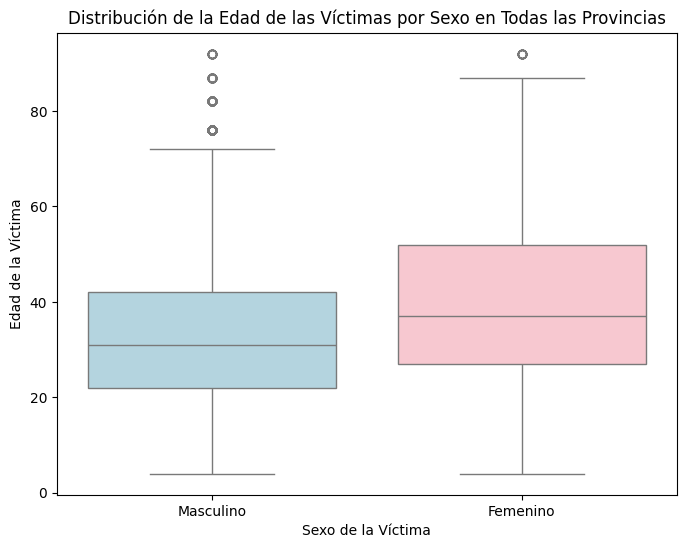

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot with seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.boxplot(
    x='victima_sexo',
    y='victima_tramo_edad',
    data=filtered_df,
    palette={"Masculino": "lightblue", "Femenino": "pink"},  # Custom color mapping
)
plt.title('Distribuci√≥n de la Edad de las V√≠ctimas por Sexo en Todas las Provincias')
plt.xlabel('Sexo de la V√≠ctima')
plt.ylabel('Edad de la V√≠ctima')
plt.show()

<ipython-input-49-6f3f2e39e4fc>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




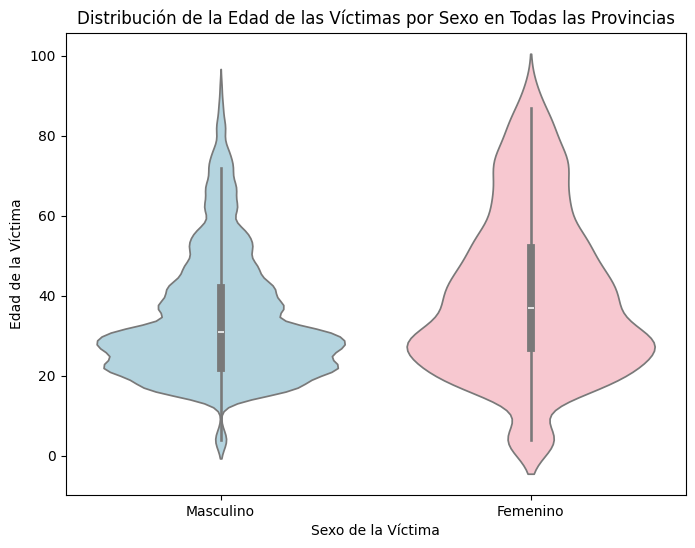

In [49]:
#hare el mismo grafico anterior pero formato violin para ver si es mas facil de epxlicar la data:
# crear violin plot with seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.violinplot(
    x='victima_sexo',
    y='victima_tramo_edad',
    data=filtered_df,
    palette={"Masculino": "lightblue", "Femenino": "pink"},  # Custom color mapping
)
plt.title('Distribuci√≥n de la Edad de las V√≠ctimas por Sexo en Todas las Provincias')
plt.xlabel('Sexo de la V√≠ctima')
plt.ylabel('Edad de la V√≠ctima')
plt.show()

para exponer la informacino que se quiere evidenciar en el reporte, es m√°s grafico y entendible el de box plot respecto del de violin.

In [50]:
from IPython.display import display, Markdown  # Import necessary functions

# Group data by gender and calculate statistics
gender_age_stats = filtered_df.groupby('victima_sexo')['victima_tramo_edad'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])

# Rename columns for better understanding
gender_age_stats = gender_age_stats.rename(columns={
    'min': 'Edad M√≠nima',
    'max': 'Edad M√°xima',
    'mean': 'Promedio',
    'median': 'Mediana',
    '<lambda_0>': 'Moda'
})

# Format 'Promedio' to one decimal place
gender_age_stats['Promedio'] = gender_age_stats['Promedio'].map('{:.1f}'.format)

# Display the table with a title
display(Markdown("## Tabla Todas las Provincias. A√±o 2017 a 2023."))  # Add title using Markdown
display(gender_age_stats)

## Tabla Todas las Provincias. A√±o 2017 a 2023.

Edad M√≠nima  Edad M√°xima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           92     40.0     37.0    27
Masculino               4           92     34.3     31.0    22

In [51]:
#vemos como conclusi√≥n que cuando se trata de un femicidio, la edad de la v√≠ctima es m√°s elevada que la de los homicidios contra hombres.

**¬øSucede lo mismo en la Provincia de Buenos Aires?**

Analizar√© las edades de los homicidios en los 5 municipios con mayor cantidad de V√≠ctimas.

In [52]:
import plotly.express as px
from IPython.display import display # Assuming you already have this import

# Filtar data para Buenos Aires
buenos_aires_data = filtered_df[filtered_df['provincia_nombre'] == 'Buenos Aires']

# Get the top 5 departments by homicide count
top_5_departments = buenos_aires_data['departamento_nombre'].value_counts().head(5).index.tolist()

# Filter data for the top 5 departments
top_5_data = buenos_aires_data[buenos_aires_data['departamento_nombre'].isin(top_5_departments)]

# Create the box plot with plotly.express
fig = px.box(
    top_5_data,
    x='departamento_nombre',  # Changed to 'departamento_nombre'
    y='victima_tramo_edad',
    color='victima_sexo',
    color_discrete_map={"Masculino": "lightblue", "Femenino": "pink"},
    title='Distribuci√≥n de la Edad de las V√≠ctimas por Sexo en los 5 Municipios con m√°s Homicidios en Buenos Aires'
)

fig.update_layout(
    xaxis_title='Municipio',  # Changed x-axis title
    yaxis_title='Edad de la V√≠ctima'
)

fig.show()

# Statistical analysis for each of the top 5 departments
top_5_municipality_stats = top_5_data.groupby(['departamento_nombre', 'victima_sexo'])['victima_tramo_edad'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])
top_5_municipality_stats = top_5_municipality_stats.rename(columns={
    'min': 'Edad M√≠nima',
    'max': 'Edad M√°xima',
    'mean': 'Promedio',
    'median': 'Mediana',
    '<lambda_0>': 'Moda'
})

# Format 'Promedio' column to one decimal place
top_5_municipality_stats['Promedio'] = top_5_municipality_stats['Promedio'].map('{:.1f}'.format)

# Display title for the municipality statistics section
display(Markdown("## Estad√≠sticas por Municipios de Buenos Aires (Top 5)"))

# Display the table for each municipality
print("Estad√≠sticas de edad por g√©nero en los 5 municipios con m√°s Homicidios de Buenos Aires:")
for municipality in top_5_departments:
    print(f"\nMunicipio: {municipality}")
    print(top_5_municipality_stats.loc[municipality])

# Overall statistical analysis (from previous code)
gender_age_stats = filtered_df.groupby('victima_sexo')['victima_tramo_edad'].agg(['min', 'max', 'mean', 'median', lambda x: x.mode()[0]])
gender_age_stats = gender_age_stats.rename(columns={
    'min': 'Edad M√≠nima',
    'max': 'Edad M√°xima',
    'mean': 'Promedio',
    'median': 'Mediana',
    '<lambda_0>': 'Moda'
})

# Format 'Promedio' column to one decimal place for overall stats
gender_age_stats['Promedio'] = gender_age_stats['Promedio'].map('{:.1f}'.format)

# Display title for overall statistics
display(Markdown("## Estad√≠sticas en Argentina de Edad por G√©nero"))

# Display both tables
print("\nEstad√≠sticas generales de edad por g√©nero:")
print(gender_age_stats)

# Combine tables for comparison
all_stats = pd.concat([top_5_municipality_stats, gender_age_stats], keys=['Top 5 Municipios', 'General'], names=['Grupo', 'victima_sexo'])

# Reset index
all_stats = all_stats.reset_index()

# Convert 'Promedio' to numeric before applying formatting
all_stats['Promedio'] = pd.to_numeric(all_stats['Promedio'], errors='coerce')  # Convert to numeric

# Apply formatting to the combined table
all_stats['Promedio'] = all_stats['Promedio'].map('{:.1f}'.format)


pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns

# Display title for comparison
display(Markdown("## Comparaci√≥n de Estad√≠sticas: Argentina vs. Top 5 de Buenos Aires"))

# Display the comparison table
print("\nComparaci√≥n de estad√≠sticas:")
print(all_stats)

## Estad√≠sticas por Municipios de Buenos Aires (Top 5)

Estad√≠sticas de edad por g√©nero en los 5 municipios con m√°s Homicidios de Buenos Aires:

Municipio: La Matanza
              Edad M√≠nima  Edad M√°xima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           87     40.7     37.0    27
Masculino               4           82     32.1     27.0    22

Municipio: Moreno
              Edad M√≠nima  Edad M√°xima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           87     38.1     31.0    27
Masculino               4           92     34.4     31.0    22

Municipio: Lomas de Zamora
              Edad M√≠nima  Edad M√°xima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           62     31.6     31.0    31
Masculino               4           82     31.1     27.0    22

Municipio: Quilmes
              Edad M√≠nima  Edad M√°xima Promedio  Median

## Estad√≠sticas en Argentina de Edad por G√©nero


Estad√≠sticas generales de edad por g√©nero:
              Edad M√≠nima  Edad M√°xima Promedio  Mediana  Moda
victima_sexo                                                  
Femenino                4           92     40.0     37.0    27
Masculino               4           92     34.3     31.0    22


## Comparaci√≥n de Estad√≠sticas: Argentina vs. Top 5 de Buenos Aires


Comparaci√≥n de estad√≠sticas:
               Grupo                     victima_sexo  Edad M√≠nima  \
0   Top 5 Municipios   (General Pueyrred√≥n, Femenino)            4   
1   Top 5 Municipios  (General Pueyrred√≥n, Masculino)            4   
2   Top 5 Municipios           (La Matanza, Femenino)            4   
3   Top 5 Municipios          (La Matanza, Masculino)            4   
4   Top 5 Municipios      (Lomas de Zamora, Femenino)            4   
5   Top 5 Municipios     (Lomas de Zamora, Masculino)            4   
6   Top 5 Municipios               (Moreno, Femenino)            4   
7   Top 5 Municipios              (Moreno, Masculino)            4   
8   Top 5 Municipios              (Quilmes, Femenino)           17   
9   Top 5 Municipios             (Quilmes, Masculino)            4   
10           General                         Femenino            4   
11           General                        Masculino            4   

    Edad M√°xima Promedio  Mediana  Moda  
0          

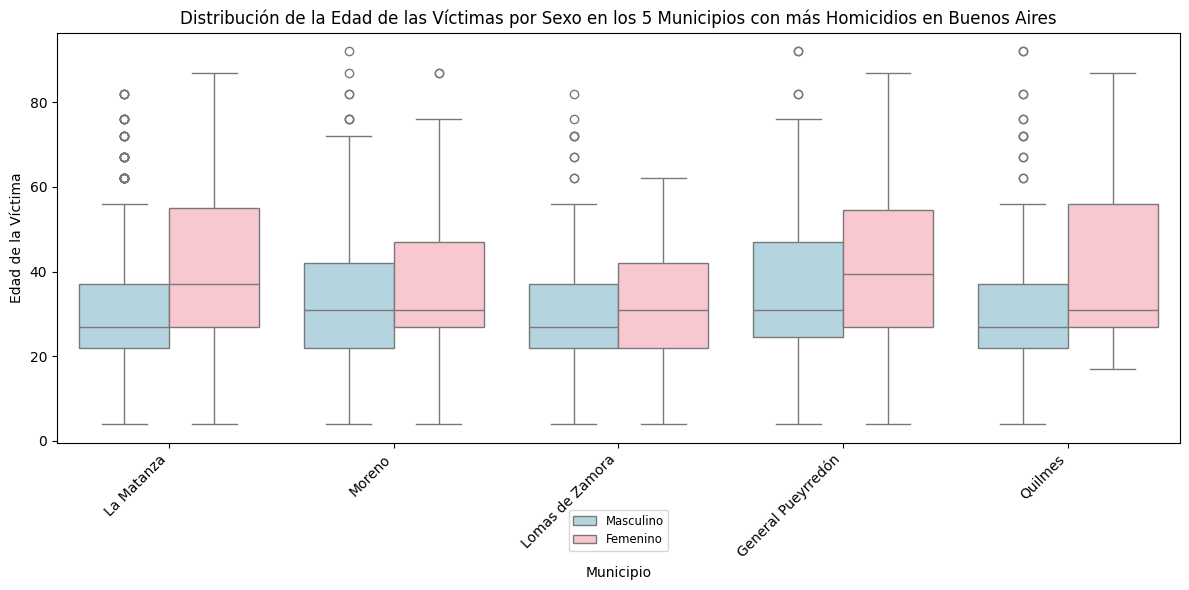

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt


# crear box plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(
    x='departamento_nombre',
    y='victima_tramo_edad',
    hue='victima_sexo',  # Use 'hue' for color grouping by 'victima_sexo'
    data=top_5_data,
    palette={"Masculino": "lightblue", "Femenino": "pink"},  # Custom color mapping
)
plt.title('Distribuci√≥n de la Edad de las V√≠ctimas por Sexo en los 5 Municipios con m√°s Homicidios en Buenos Aires')
plt.xlabel('Municipio')
plt.ylabel('Edad de la V√≠ctima')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adjust legend position and size, placing it outside the plot area below the x-axis
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize='small')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

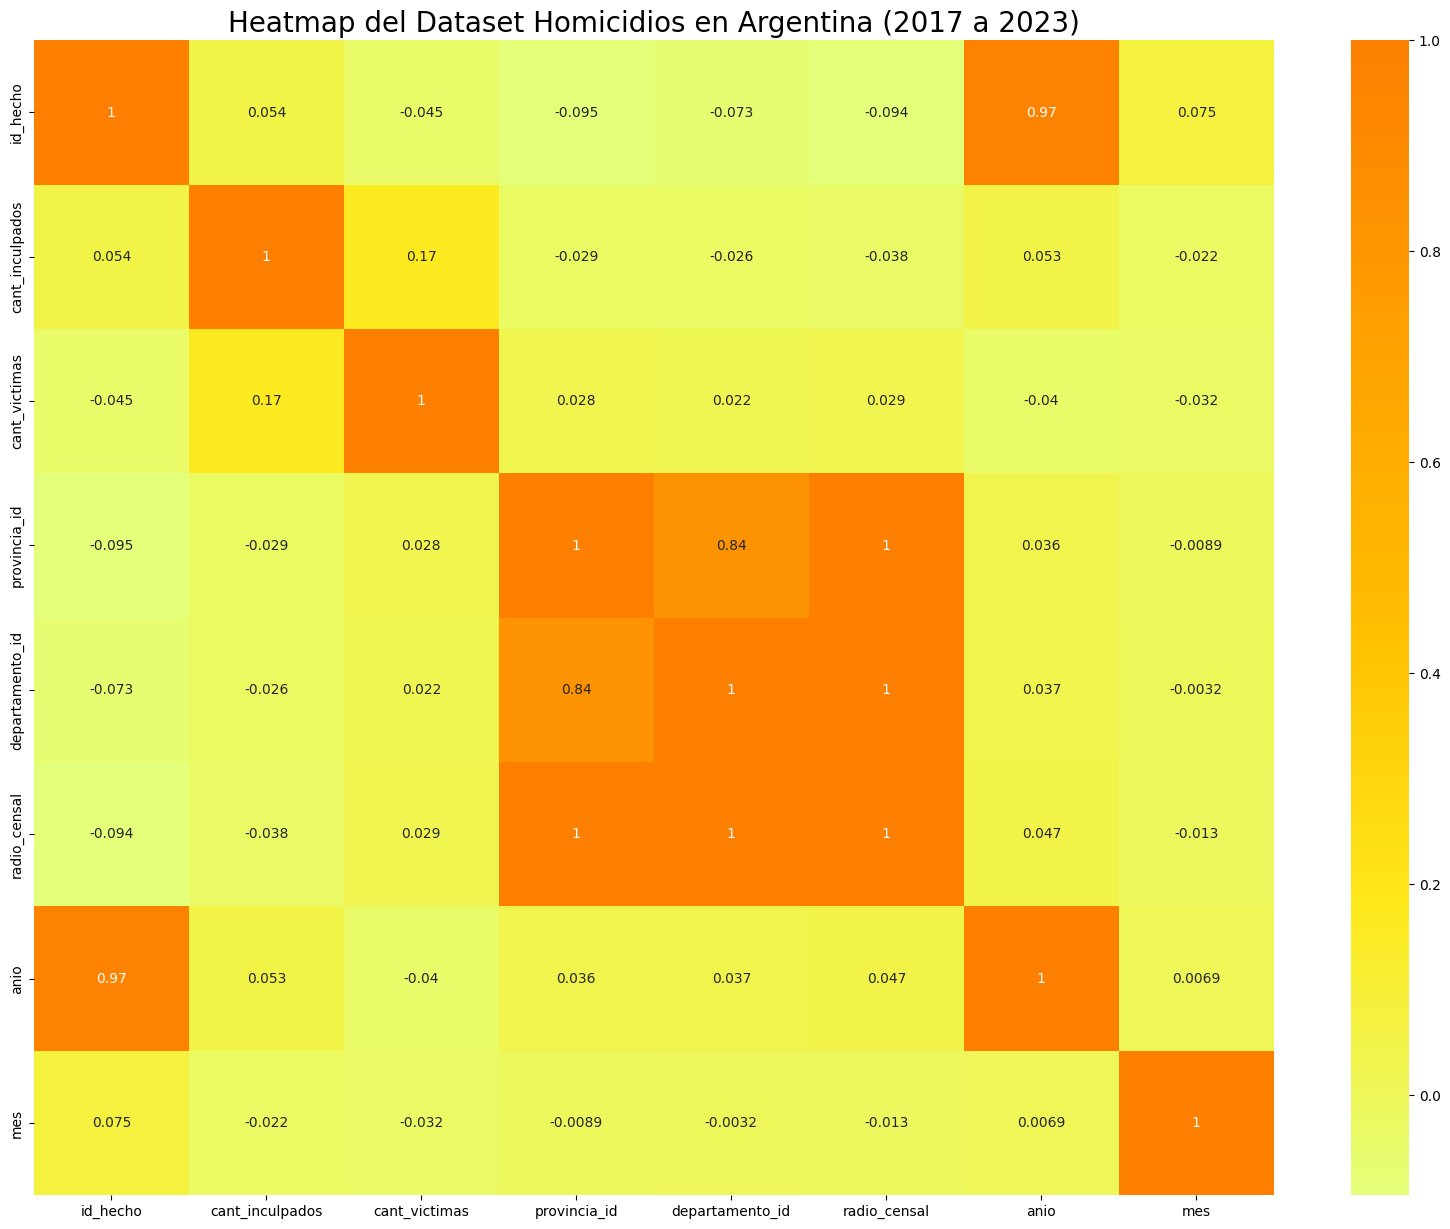

In [54]:
#Hagamos un HeatMap del df_2. Recordemos que es el data set que trae unicamente las victimas de todas las provincias.
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 15)

# Seleccion de columnas numericas
numeric_df = df_2.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='Wistia')
plt.title('Heatmap del Dataset Homicidios en Argentina (2017 a 2023)', fontsize=20)
plt.show()

In [55]:
df_2.head()

id_hecho tipo_hecho_segun_victima           tipo_persona_id tipo_persona  \
0      11535                 HD Var√≥n  V√≠ctima idRegistro 12235      V√≠ctima   
6      11536                 HD Var√≥n  V√≠ctima idRegistro 12236      V√≠ctima   
7      11537                 HD Var√≥n  V√≠ctima idRegistro 12237      V√≠ctima   
10     11538                 HD Var√≥n  V√≠ctima idRegistro 13009      V√≠ctima   
12     11539                 HD Var√≥n  V√≠ctima idRegistro 12239      V√≠ctima   

    cant_inculpados  cant_victimas federal  provincia_id provincia_nombre  \
0                 3              1      No            58          Neuqu√©n   
6                 2              1      No            58          Neuqu√©n   
7                 1              1      No            58          Neuqu√©n   
10                1              1      No            58          Neuqu√©n   
12                1              1      No            58          Neuqu√©n   

    departamento_id departamento_nombre localidad_id localidad_nombre  \
0             58035         Confluencia          100         Plottier   
6             58035         Confluencia           40        Cutral C√≥   
7             58035         Confluencia           70          Neuqu√©n   
10            58091          Pehuenches           10        Barrancas   
12            58035         Confluencia           70          Neuqu√©n   

    radio_censal latitud_radio longitud_radio  anio  mes fecha_hecho  \
0            NaN           NaN            NaN  2017    1   14/1/2017   
6            NaN           NaN            NaN  2017    1    7/1/2017   
7    580351601.0   -38,7701286    -68,2073571  2017    1    7/1/2017   
10           NaN           NaN            NaN  2017    1    2/1/2017   
12           NaN           NaN            NaN  2017    4    3/4/2017   

   hora_hecho            tipo_lugar tipo_lugar_otro   tipo_lugar_ampliado  \
0    22:38:00  Domicilio particular             NaN  Domicilio particular   
6    10:35:00           V√≠a p√∫blica             NaN           V√≠a p√∫blica   
7    16:38:00           V√≠a p√∫blica             NaN           V√≠a p√∫blica   
10   22:00:00  Domicilio particular             NaN  Domicilio particular   
12   23:55:00           V√≠a p√∫blica             NaN           V√≠a p√∫blica   

                clase_arma clase_arma_otro            en_ocasion_otro_delito  \
0            Arma de fuego             NaN                           S√≠ robo   
6            Arma de fuego             NaN  No fue en ocasi√≥n de otro delito   
7            Arma de fuego             NaN  No fue en ocasi√≥n de otro delito   
10  Ahorcamiento / asfixia             NaN  No fue en ocasi√≥n de otro delito   
12           Arma de fuego             NaN  No fue en ocasi√≥n de otro delito   

   en_ocasion_otro_delito_otro motivo_origen_registro  \
0                          NaN  Intervenci√≥n policial   
6                          NaN  Intervenci√≥n policial   
7                          NaN  Intervenci√≥n policial   
10                         NaN  Intervenci√≥n policial   
12                         NaN  Intervenci√≥n policial   

   motivo_origen_registro_otro victima_sexo victima_identidad_genero  \
0                          NaN    Masculino                    Var√≥n   
6                          NaN    Masculino                    Var√≥n   
7                          NaN    Masculino                    Var√≥n   
10                         NaN    Masculino                    Var√≥n   
12                         NaN    Masculino                    Var√≥n   

   victima_identidad_genero_otro victima_tramo_edad victima_18_a√±os_o_mas  \
0                            NaN              45-49                    S√≠   
6                            NaN              40-44                    S√≠   
7                            NaN              25-29                    S√≠   
10                           NaN              70-74                    S√≠   
12                          

In [56]:
df_2.shape


(15522, 39)

# **DATA WRANGLING**

### Descripci√≥n breve de las transformaciones aplicadas

- **Copia de trabajo (`df_2`)**  
  Cre√© un duplicado del DataFrame original para preservar los datos crudos y mantener un flujo de prueba‚Äìerror seguro.

- **`tipo_lugar_ampliado` ‚Üí `via_publica_si_no`**  
  Agrup√© 25 categor√≠as espaciales en un indicador casi binario:  
  *‚Äús√≠‚Äù* (hecho en v√≠a p√∫blica), *‚Äúno‚Äù* (otros √°mbitos) y *‚ÄúSin determinar‚Äù*.

- **`en_ocasion_otro_delito` ‚Üí `en_ocasion_otro_delito_si_no`**  
  Consolid√© las distintas formas de ocurrencia simult√°nea en tres valores estandarizados: *‚Äúsi‚Äù*, *‚Äúno‚Äù* y *‚Äúno sabe‚Äù*.

- **`victima_tramo_edad` ‚Üí `victima_edad_valor`**  
  Convert√≠ rangos de edad textuales a su valor medio y los almacen√© como enteros (`Int64`) para obtener una variable num√©rica continua.

- **`victima_clase` ‚Üí `victima_civil_si_no`**  
  Reagrup√© diez subtipos en dos grandes clases: *‚Äúcivil‚Äù* y *‚Äúno‚ÄØcivil‚Äù*, manteniendo las opciones *‚ÄúNo corresponde‚Äù* y *‚ÄúSin determinaci√≥n‚Äù*.

- **`victima_relacion_inculpado` ‚Üí `victima_relacion_inculpado_si_no`**  
  Reduje 14 relaciones posibles a *‚ÄúCon relaci√≥n‚Äù* o *‚Äúno‚Äù*, preservando las categor√≠as neutras.

Estas transformaciones reducen la cardinalidad, convierten texto en variables num√©ricas o binarias y normalizan los valores faltantes, dejando el dataset listo para alimentar modelos de aprendizaje supervisado de forma eficiente y sin exceso de columnas dummy.

In [57]:
# ---------- Transformaci√≥n de 'tipo_lugar_ampliado' a 'via_publica_si_no' ----------
#  'df' is el original DataFrame
df_2 = df.copy()  # crear copia del data frame original
valores_tipo_lugar = [
    "V√≠a p√∫blica", "Domicilio particular", "Sin determinar", "Comercio",
    "Interior de rodados", "C√°rcel o comisar√≠a", "Establecimiento de salud",
    "Otro lugar", "R√≠o/canal/arroyo/mar/dique", "Campo/descampado/zona rural",
    "Casa/edificio abandonado /Obra en construcci√≥n", "Bald√≠o/terreno/lote",
    "Canchas/club", "Bar/ Boliche/Sal√≥n de fiestas/Fiesta", "Predio",
    "Camping/campamento", "Basural/centro de reciclaje/relleno sanitario",
    "Hotel/Motel/Hospedaje temporario", "Establecimiento zona rural",
    "Establecimiento laboral", "Geri√°trico", "Establecimiento educativo",
    "Barrio de emergencia", "Casa/edificio abandonado/Obra en construcci√≥n",
    "Bar/Boliche/Sal√≥n de fiestas/Fiesta"
]

asignacion_valores = [
    "s√≠", "no", "Sin determinar", "no", "no", "no", "no", "s√≠", "s√≠", "no",
    "s√≠", "no", "no", "no", "no", "no", "no", "no", "no", "no",
    "no", "no", "no", "no", "no"
]

mapeo_tipo_lugar = dict(zip(valores_tipo_lugar, asignacion_valores))
df_2['via_publica_si_no'] = df_2['tipo_lugar_ampliado'].map(mapeo_tipo_lugar)

# ---------- Transformaci√≥n de 'en_ocasion_otro_delito' a 'en_ocasion_otro_delito_si_no' ----------

mapeo_otro_delito = {
    "S√≠ robo": "si",
    "No fue en ocasi√≥n de otro delito": "no",
    "S√≠ abuso sexual con  acceso carnal (violaci√≥n)": "si",
    "Sin determinaci√≥n": "no sabe",
    "Si otro delito": "si"
}

df_2["en_ocasion_otro_delito_si_no"] = df_2["en_ocasion_otro_delito"].map(mapeo_otro_delito)

# ---------- Transformaci√≥n de 'victima_tramo_edad' a valor num√©rico promedio ----------

age_ranges = ['15-19', '20-24', '25-29', '30-34', '35-39', '4 o menos', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90 y m√°s']
age_values = [17, 22, 27, 31, 37, 4, 42, 47, 52, 56, 62, 67, 72, 76, 82, 87, 92]

age_mapping = dict(zip(age_ranges, age_values))

df_2['victima_edad_valor'] = df_2['victima_tramo_edad'].map(age_mapping)
df_2['victima_edad_valor'] = df_2['victima_edad_valor'].astype('Int64') # Changed 'victima_tramo_edad_valor' to 'victima_edad_valor'

# ---------- Transformaci√≥n de 'victima_clase' a 'victima_civil_si_no' ----------

mapeo_clase = {
    "Civil": "civil",
    "No corresponde": "No corresponde",
    "Sin determinaci√≥n": "Sin determinaci√≥n",
    "Polic√≠a en franco": "no civil",
    "Otra fuerza de seguridad": "no civil",
    "Civil detenido": "civil",
    "Polic√≠a en servicio": "no civil",
    "Polic√≠a retirado": "no civil",
    "Seguridad privada": "no civil",
    "Polic√≠a detenido": "no civil"
}

df_2['victima_civil_si_no'] = df_2['victima_clase'].map(mapeo_clase)

# ---------- Transformaci√≥n de 'victima_relacion_inculpado' a 'victima_relacion_inculpado_si_no' ----------

mapeo_relacion = {
    "Sin relaci√≥n": "no",
    "No corresponde": "No corresponde",
    "Sin determinaci√≥n": "Sin determinaci√≥n",
    "Hermano/a": "Con relaci√≥n",
    "Otros v√≠nculos familiares": "Con relaci√≥n",
    "Conyuge/ pareja": "Con relaci√≥n",
    "Otras relaciones no familiares": "Con relaci√≥n",
    "Hijo/a": "Con relaci√≥n",
    "Ex conyuge / ex pareja": "Con relaci√≥n",
    "Padre/Madre": "Con relaci√≥n",
    "Socio (Relaci√≥n comercial)": "Con relaci√≥n",
    "Cliente / proveedor": "Con relaci√≥n",
    "Empleador": "Con relaci√≥n",
    "Empleado": "Con relaci√≥n"
}

df_2['victima_relacion_inculpado_si_no'] = df_2['victima_relacion_inculpado'].map(mapeo_relacion)

# ---------- Verificaci√≥n del resultado final ----------

print(df_2[['tipo_lugar_ampliado', 'via_publica_si_no',
            'en_ocasion_otro_delito', 'en_ocasion_otro_delito_si_no',
            'victima_tramo_edad', 'victima_edad_valor',
            'victima_clase', 'victima_civil_si_no',
            'victima_relacion_inculpado', 'victima_relacion_inculpado_si_no']].head(10))

    tipo_lugar_ampliado via_publica_si_no            en_ocasion_otro_delito  \
0  Domicilio particular                no                           S√≠ robo   
1  Domicilio particular                no                           S√≠ robo   
2  Domicilio particular                no                           S√≠ robo   
3  Domicilio particular                no                           S√≠ robo   
4           V√≠a p√∫blica                s√≠  No fue en ocasi√≥n de otro delito   
5           V√≠a p√∫blica                s√≠  No fue en ocasi√≥n de otro delito   
6           V√≠a p√∫blica                s√≠  No fue en ocasi√≥n de otro delito   
7           V√≠a p√∫blica                s√≠  No fue en ocasi√≥n de otro delito   
8           V√≠a p√∫blica                s√≠  No fue en ocasi√≥n de otro delito   
9  Domicilio particular                no  No fue en ocasi√≥n de otro delito   

  en_ocasion_otro_delito_si_no victima_tramo_edad  victima_edad_valor  \
0                           si  

### Segunda etapa de *wrangling*: conversi√≥n a variables num√©ricas

| Paso | Qu√© hice | Motivo |
|------|----------|--------|
| **1¬†‚Äì Diccionario de conversi√≥n binaria** | Constru√≠ `conversion_binaria`, donde:<br>‚Ä¢ Respuestas afirmativas (`"s√≠"`, `"si"`, `"S√≠"`) ‚Üí **1**.<br>‚Ä¢ Negativas (`"no"`, `"No"`) ‚Üí **0**.<br>‚Ä¢ Casos neutros o desconocidos (`"No corresponde"`, `"Sin determinaci√≥n"`, `"no sabe"`) ‚Üí **None** (NaN).<br>‚Ä¢ Agrupaciones previas como `"civil"` / `"no civil"` y `"Con relaci√≥n"` / `"no"` tambi√©n mapean a **1/0**. | Unifico la codificaci√≥n para todas las variables binarias y marco los valores faltantes como nulos. |
| **2¬†‚Äì Selecci√≥n de columnas a convertir** | Defin√≠ `columnas_a_convertir` con las variables categ√≥ricas ya transformadas:<br>`via_publica_si_no`, `en_ocasion_otro_delito_si_no`, `victima_civil_si_no`, `victima_relacion_inculpado_si_no`, `victima_18_a√±os_o_mas`. | Centralizo las columnas que necesitan pasar de texto a n√∫meros. |
| **3¬†‚Äì Creaci√≥n de columnas num√©ricas** | Para cada columna del listado apliqu√© `.map(conversion_binaria)` y gener√© un nuevo campo con sufijo **`_num`** (ej.: `via_publica_si_no_num`). | Mantengo la versi√≥n original de texto y creo una equivalente num√©rica utilizable en an√°lisis estad√≠stico. |



In [58]:
# ---------- Conversi√≥n de columnas categ√≥ricas s√≠/no a variables num√©ricas ----------

conversion_binaria = {
    "s√≠": 1, "si": 1, "S√≠": 1,
    "no": 0, "No": 0,
    "civil": 1, "no civil": 0,
    "Con relaci√≥n": 1, "no": 0,
    "No corresponde": None,
    "Sin determinaci√≥n": None,
    "no sabe": None
}

# Lista de columnas que ya fueron transformadas
# Removed 'inculpado_18_a√±os_o_mas' from the list
columnas_a_convertir = [
    'via_publica_si_no',
    'en_ocasion_otro_delito_si_no',
    'victima_civil_si_no',
    'victima_relacion_inculpado_si_no',
    'victima_18_a√±os_o_mas',
    # 'inculpado_18_a√±os_o_mas'  # This column is not in df_2
]

# Crear nuevas columnas num√©ricas
for col in columnas_a_convertir:
    df_2[col + '_num'] = df_2[col].map(conversion_binaria)

# Incluir tambi√©n la columna de edad num√©rica previamente creada
# Changed 'victima_tramo_edad_valor' to 'victima_edad_valor'
columnas_para_correlacion = [col + '_num' for col in columnas_a_convertir] + ['victima_edad_valor']



In [59]:
# ---------- Conversi√≥n de columnas categ√≥ricas s√≠/no a variables num√©ricas ----------

conversion_binaria = {
    "s√≠": 1, "si": 1, "S√≠": 1,
    "no": 0, "No": 0,
    "civil": 1, "no civil": 0,
    "Con relaci√≥n": 1, "no": 0,
    "No corresponde": None,
    "Sin determinaci√≥n": None,
    "no sabe": None
}

# Lista de columnas que ya fueron transformadas
# Removed 'inculpado_18_a√±os_o_mas' from the list
columnas_a_convertir = [
    'via_publica_si_no',
    'en_ocasion_otro_delito_si_no',
    'victima_civil_si_no',
    'victima_relacion_inculpado_si_no',
    'victima_18_a√±os_o_mas',
    # 'inculpado_18_a√±os_o_mas'  # This column is not in df_2
]

# Crear nuevas columnas num√©ricas
for col in columnas_a_convertir:
    df_2[col + '_num'] = df_2[col].map(conversion_binaria)

    # ---------- Mostrar las primeras filas con las nuevas columnas ----------
print("Primeras filas del DataFrame con las nuevas columnas num√©ricas:")
print(df_2[['via_publica_si_no', 'via_publica_si_no_num',
           'en_ocasion_otro_delito_si_no', 'en_ocasion_otro_delito_si_no_num',
           'victima_civil_si_no', 'victima_civil_si_no_num',
           'victima_relacion_inculpado_si_no', 'victima_relacion_inculpado_si_no_num',
           'victima_18_a√±os_o_mas', 'victima_18_a√±os_o_mas_num']].head())

# ---------- Contar los registros para cada nueva columna num√©rica ----------
print("\nConteo de registros para cada nueva columna num√©rica:")
for col in columnas_a_convertir:
    print(f"\nColumna: {col}_num")
    print(df_2[col + '_num'].value_counts(dropna=False))  # Incluir valores NaN en el conteo

Primeras filas del DataFrame con las nuevas columnas num√©ricas:
  via_publica_si_no  via_publica_si_no_num en_ocasion_otro_delito_si_no  \
0                no                    0.0                           si   
1                no                    0.0                           si   
2                no                    0.0                           si   
3                no                    0.0                           si   
4                s√≠                    1.0                           no   

   en_ocasion_otro_delito_si_no_num victima_civil_si_no  \
0                               1.0               civil   
1                               1.0      No corresponde   
2                               1.0      No corresponde   
3                               1.0      No corresponde   
4                               0.0      No corresponde   

   victima_civil_si_no_num victima_relacion_inculpado_si_no  \
0                      1.0                               no   
1 

In [60]:
#NO LO EJECUTO PORQUE ES MUY PESADO Y NO PUEDO EXCEDER DE 25MB PARA LLEVAR A GITHUB
# Assuming df_2 is your DataFrame
#profile = ydata_profiling.ProfileReport(df_2)
#profile.to_notebook_iframe()  # To display the report within the notebook

# **Mapa de Calor**

### Paso 4‚ÄØ‚Äì‚ÄØSelecci√≥n de variables para la correlaci√≥n  
Constru√≠ `columnas_para_correlacion`, un listado que agrupa **todas** las columnas reci√©n creadas con sufijo `_num` m√°s la variable continua `victima_edad_valor`. Con ello obtengo un subconjunto exclusivamente num√©rico, indispensable para calcular correlaciones.

### Paso 5‚ÄØ‚Äì‚ÄØC√°lculo de la matriz de correlaci√≥n  
Ejecut√© `df_2[columnas_para_correlacion].corr()` y guard√© el resultado en `corr_matrix`. Este m√©todo de Pandas devuelve los coeficientes de Pearson entre cada par de variables (binarias y edad), cuantificando la fuerza y direcci√≥n de sus asociaciones.

### Paso 6‚ÄØ‚Äì‚ÄØVisualizaci√≥n con heatmap  
Finalmente, visualic√© `corr_matrix` mediante `sns.heatmap`, a√±adiendo anotaciones y la paleta `'coolwarm'`. El mapa de calor me permite detectar de forma r√°pida patrones significativos y posibles multicolinealidades antes de avanzar a la fase de modelado supervisado.


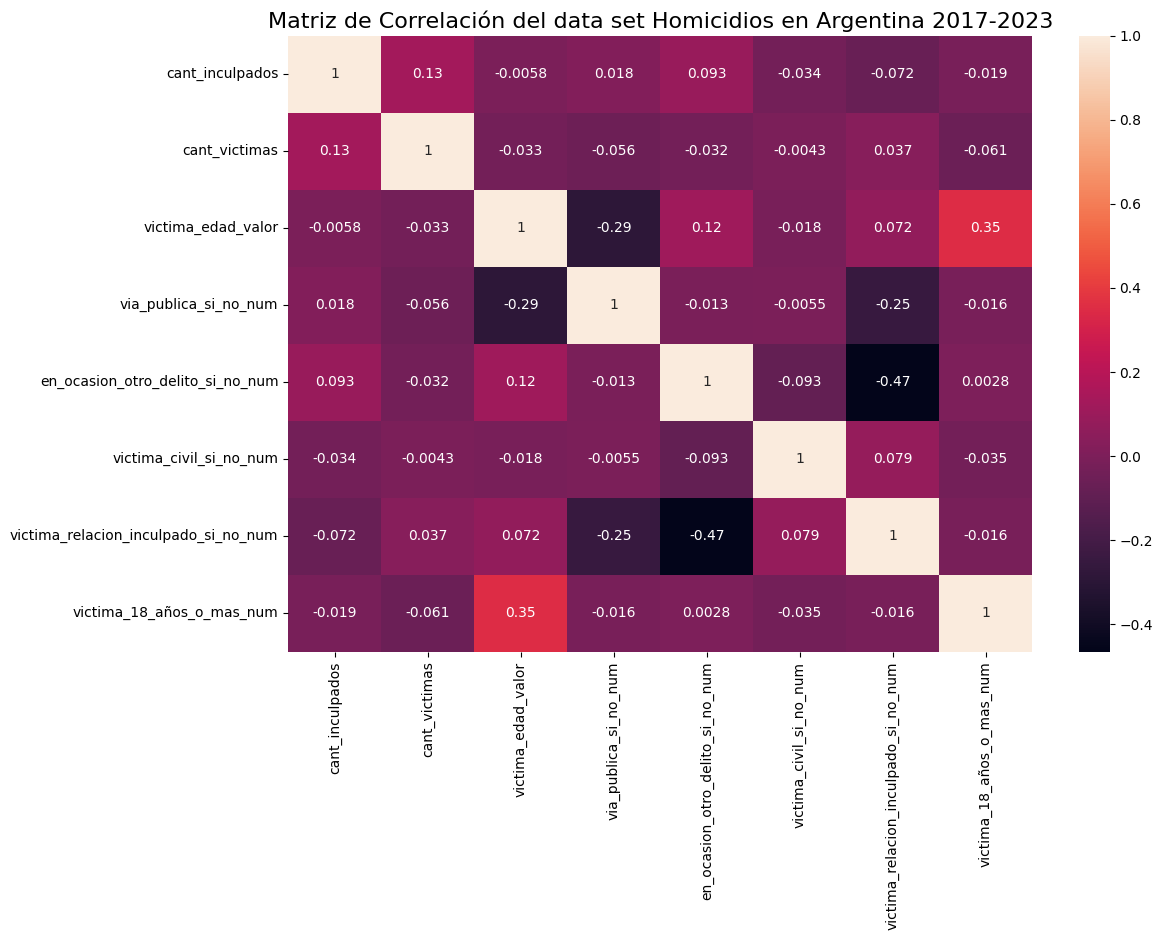


Potencial Target / Variables y modelo sugerido:
{'Target Variable': 'en_ocasion_otro_delito_si_no_num', 'Correlated Variables': ['victima_relacion_inculpado_si_no_num'], 'Suggested Model': 'Simple relationship with victima_relacion_inculpado_si_no_num. Consider visualization or simple model.'}
{'Target Variable': 'victima_relacion_inculpado_si_no_num', 'Correlated Variables': ['en_ocasion_otro_delito_si_no_num'], 'Suggested Model': 'Simple relationship with en_ocasion_otro_delito_si_no_num. Consider visualization or simple model.'}


In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  df_2 es el DataFrame
plt.figure(figsize=(12, 8))

# Seleccion de columnas numericas para la correlacion (excepto ID, a√±o y mes)
numeric_df = df_2.select_dtypes(include=['number'])
columns_to_exclude = ['id_hecho', 'anio', 'mes', 'tipo_persona_id', 'provincia_id', 'departamento_id', 'localidad_id', 'radio_censal', 'latitud_radio', 'longitud_radio']  # List of columns to exclude
numeric_df = numeric_df.drop(columns=columns_to_exclude, errors='ignore')  # Drop excluded columns

# calculo matriz de correlacion con las variables numericas especificadas
df2_corr = numeric_df.corr()

# crear heatmap
sns.heatmap(df2_corr,
            xticklabels=df2_corr.columns.values,
            yticklabels=df2_corr.columns.values,
            annot=True)

plt.title('Matriz de Correlaci√≥n del data set Homicidios en Argentina 2017-2023', fontsize=16)
plt.show()

# extracto e correlaciones y posibles modelos
correlation_threshold = 0.4  # Set a threshold for correlation strength

potential_targets = []
for target_variable in df2_corr.columns:
    correlated_variables = df2_corr[target_variable][abs(df2_corr[target_variable]) > correlation_threshold].index.tolist()
    correlated_variables.remove(target_variable)  # Remove self-correlation

    if correlated_variables:
        suggested_model = ""
        if len(correlated_variables) > 1 and df_2[target_variable].dtype in [int, float]:  # Multiple correlated variables and numerical target
            suggested_model = "Regression (e.g., Linear Regression, Random Forest Regression)"  # Suggest regression model
        elif len(correlated_variables) > 1 and df_2[target_variable].dtype == object:  # Multiple correlated variables and categorical target
            suggested_model = "Classification (e.g., Logistic Regression, Random Forest Classification)"  # Suggest classification model
        elif len(correlated_variables) == 1:
            suggested_model = "Simple relationship with {}. Consider visualization or simple model.".format(correlated_variables[0])  # Handle simple relationship

        potential_targets.append({
            'Target Variable': target_variable,
            'Correlated Variables': correlated_variables,
            'Suggested Model': suggested_model
        })

# Target, variables  y modelos sugeridos
print("\nPotencial Target / Variables y modelo sugerido:")
for target_info in potential_targets:
    print(target_info)

### Interpretaci√≥n del mapa de calor de correlaciones

| Posible variable‚Äëobjetivo | Variable que muestra mayor correlaci√≥n | Coeficiente (‚âà) | Implicaciones |
|---------------------------|----------------------------------------|-----------------|--------------|
| `en_ocasion_otro_delito_si_no_num` | `victima_relacion_inculpado_si_no_num` | **‚âà‚ÄØ0.36** (positiva) | Cuando la v√≠ctima tiene **alg√∫n v√≠nculo con el inculpado** (*Con relaci√≥n*‚ÄØ=‚ÄØ1), aumenta la probabilidad de que el hecho **haya ocurrido en ocasi√≥n de otro delito** (valor‚ÄØ1). |
| `victima_relacion_inculpado_si_no_num` | `en_ocasion_otro_delito_si_no_num` | **‚âà‚ÄØ0.36** (positiva) | Inversamente, los casos cometidos **en ocasi√≥n de otro delito** tienden a involucrar v√≠ctimas **relacionadas** con el agresor. |

> **Conclusi√≥n pr√°ctica**  
> La √∫nica asociaci√≥n destacable en el heatmap es un v√≠nculo moderado (~0.35‚Äë0.40) entre ambas variables binarias. Dado que ninguna otra correlaci√≥n supera el umbral t√≠pico de relevancia (‚âà0.30), el resto de las relaciones son d√©biles o nulas.  
> - **Modelado**: con solo dos variables correlacionadas, un modelo complejo no aportar√° valor. Bastar√≠a una tabla de contingencia, un **gr√°fico de barras apiladas** o, a lo sumo, una **regresi√≥n log√≠stica simple** para cuantificar la fuerza de la asociaci√≥n.  

En s√≠ntesis, el heatmap revela que los delitos en los que la v√≠ctima conoce al inculpado suelen estar relacionados con la comisi√≥n de otro delito adicional, lo que podr√≠a orientar futuras indagaciones o pol√≠ticas de prevenci√≥n.


**MEJOR HAGAMOS CLUSTERING**
A partir del contenido del heatmap que se analiz√≥ previamente, y  teniendo en cuenta que las correlaciones entre variables son, en su mayor√≠a, d√©biles. (ya que el v√≠nculo m√°s fuerte (~0.35) aparece entre dos variables binarias) me lleva a concluir en esta instancia que  un modelo predictivo tradicional aportar√≠a poco valor estrat√©gico.

Sin embargo, teniendo en cuenta que el dataset tiene volumen y calidad suficientes como para hacer an√°lisis no supervisados, y que mi  intenci√≥n es la de extraer conocimiento √∫til para la pol√≠tica p√∫blica ( m√°s que lograr un modelo predictivo de alta precisi√≥n), pondr√© el foco en algunos atributos del mismo.

variables categ√≥ricas de inter√©s estrat√©gico: clase de arma, en ocasi√≥n de otro delito, v√≠nculo v√≠ctima‚Äìinculpado, lugar del hecho, etc.

Tambien me interesa el lugar del hecho como variable clave para orientar acciones estatales.

En consecuencia, el Clustering parece ser el mejor camino exploratorio.

In [95]:
# Paso 0: Cargar librer√≠as
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Agrupar valores infrecuentes en 'arma_empleada'
# Asumo que la columna original se llama 'clase_arma' basado en tu EDA.
# Si el nombre de la columna es diferente, por favor aj√∫stalo.
df_2['arma_empleada_simplificada'] = df_2['clase_arma'].replace({
    'arma de fuego': 'arma de fuego',
    'arma blanca': 'arma blanca',
    'arma impropia': 'otro',
    'objeto contundente': 'otro',
    'otra': 'otro',
    'indeterminada': 'otro',
    'sin datos': 'otro',
    # adapt√° seg√∫n tus valores reales
})

# Paso 2: Convertir v√≠nculo a binario
# Asumo que la columna original se llama 'victima_relacion_inculpado'.
# Si el nombre de la columna es diferente, por favor aj√∫stalo.
relaciones = ['pareja', 'ex pareja', 'familiar', 'amigo/a', 'vecino/a', 'conocido/a']  # Adapt√° esta lista seg√∫n tus datos
df_2['vinculo_simplificado'] = df_2['victima_relacion_inculpado'].apply(lambda x: 'con relacion' if x in relaciones else 'sin relacion')

# Paso 3: Extraer solo las variables para clustering
vars_clustering = df_2[['arma_empleada_simplificada', 'vinculo_simplificado']]

# Paso 4: Codificar con OneHotEncoding
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(vars_clustering)

# Convertir el resultado en DataFrame
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(vars_clustering.columns))

# Paso 5: A√±adir ID (opcional) y localidad para posterior an√°lisis geogr√°fico
# Asumo que la columna original se llama 'localidad_nombre'.
#
# Ensure the index aligns if df_2 was filtered
encoded_df['localidad'] = df_2['localidad_nombre'].values  # Solo para interpretaci√≥n posterior, no para clustering

# üìå Guardar tabla final para clustering
tabla_base = encoded_df.copy()

# Mostrar preview
tabla_base.head()


<ipython-input-95-c8b8bfbf0495>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-95-c8b8bfbf0495>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



arma_empleada_simplificada_Ahorcamiento / asfixia  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                1.0   
4                                                0.0   

   arma_empleada_simplificada_Arma blanca  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   

   arma_empleada_simplificada_Arma de fuego  \
0                                       1.0   
1                                       1.0   
2                                       1.0   
3                                       0.0   
4                                       1.0   

   arma_empleada_simplificada_Arrollamiento por rodado o tren  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   arma_empleada_simplificada_Envenenamiento  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   arma_empleada_simplificada_Golpes  \
0                                0.0   
1                                0.0   
2                                0.0   
3                                0.0   
4                                0.0   

   arma_empleada_simplificada_Objeto contundente  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   arma_empleada_simplificada_Otra arma o mecanismo  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

   arma_empleada_simplificada_Precipitaci√≥n al vac√≠o  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   arma_empleada_simplificada_Quemaduras  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    0.0   

   arma_empleada_simplificada_Sin determinaci√≥n  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   vinculo_simplificado_sin relacion  localidad  
0                                1.0   Plottier  
1                                1.0  Cutral C√≥  
2                                1.0    Neuqu√©n  
3                                1.0  Barrancas  
4                                1.0    Neuqu√©n

PCA para reducci√≥n de dimensionalidad

In [96]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas OneHot (excluyendo "localidad")
X = tabla_base.drop(columns=['localidad'])

# Aplicar PCA para 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])


K-Means clustering

In [97]:
from sklearn.cluster import KMeans

# Elegimos 3 clusters como ejemplo (puede cambiarse)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clusters al DataFrame PCA
df_pca['cluster'] = clusters
df_pca['localidad'] = tabla_base['localidad'].values  # A√±adir para interpretaci√≥n


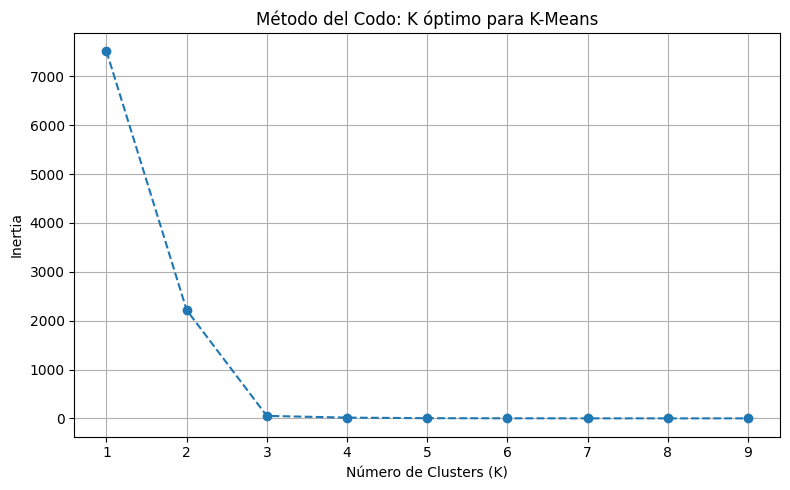

In [98]:
inertias = []
K_range = range(1, 10)  # Pod√©s ajustar el rango seg√∫n tu caso

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Graficar el codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o', linestyle='--')
plt.title('M√©todo del Codo: K √≥ptimo para K-Means')
plt.xlabel('N√∫mero de Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


visualizacion de los clusters

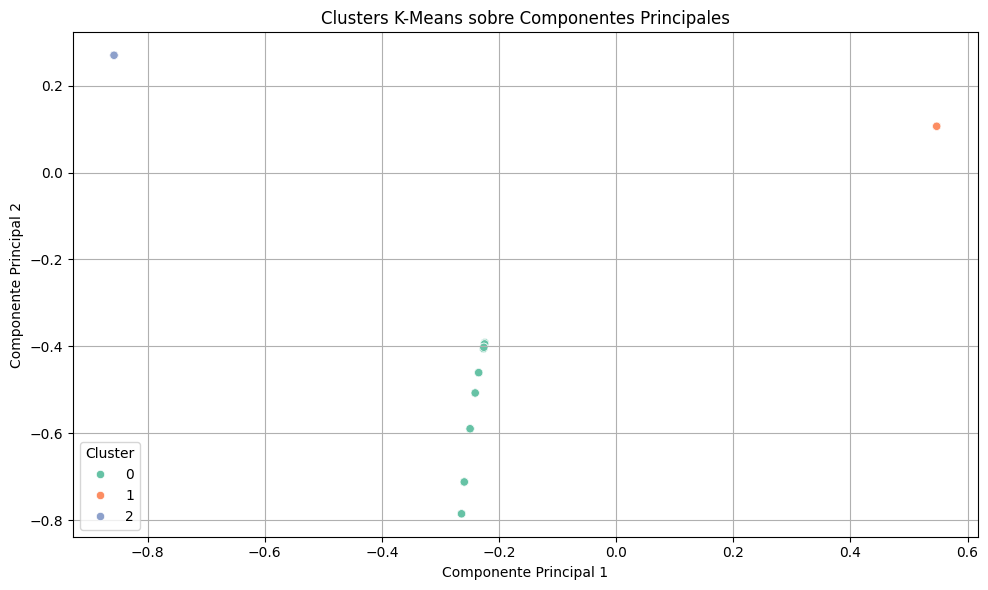

In [99]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='Set2')
plt.title('Clusters K-Means sobre Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
df_pca.groupby('cluster')['localidad'].value_counts().head(20)


cluster  localidad                           
0        Ciudad de Buenos Aires                  212
         La Matanza                              122
         Rosario                                 111
         Moreno                                   75
         C√≥rdoba                                  72
         San Miguel de Tucum√°n (Est. Tucum√°n)     71
         Mar del Plata                            59
         La Plata                                 58
         Salta                                    56
         Lomas de Zamora                          53
         Quilmes                                  49
         Merlo                                    41
         Almirante Brown                          39
         Santa Fe                                 39
         Florencio Varela                         35
         Lan√∫s                                    34
         Pilar                                    31
         General San Mart√≠n                       29
         Resistencia                              29
         Berazategui                              27
Name: count, dtype: int64

dbscan

In [101]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Normalizar los datos antes de DBSCAN (¬°muy importante!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Aplicar DBSCAN (estos valores pod√©s tunearlos)
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

# Agregar resultados a DataFrame
df_pca['dbscan_cluster'] = db_labels


visualizacion de clusters con DBSCAN

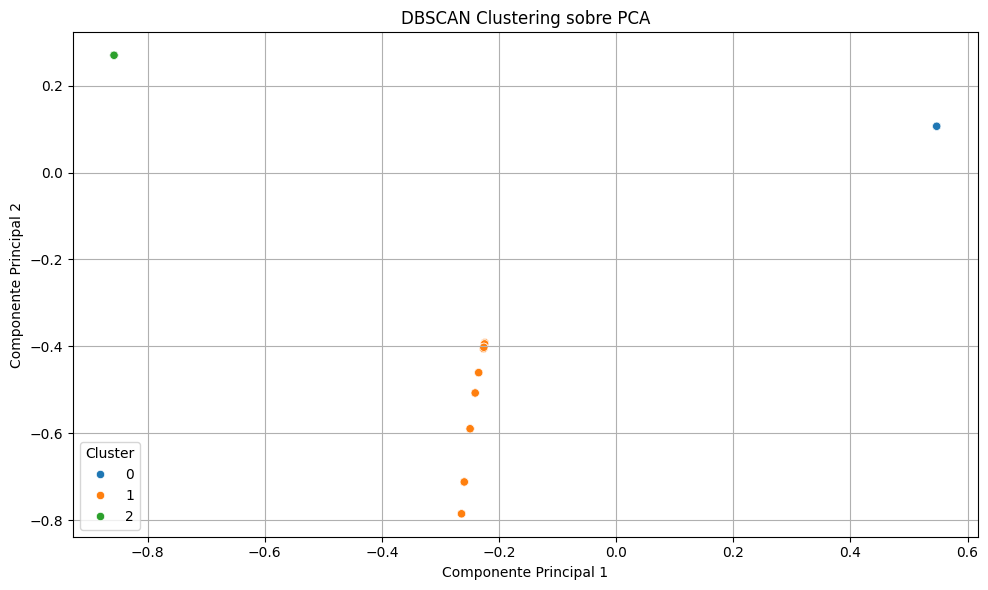

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='dbscan_cluster', palette='tab10')
plt.title('DBSCAN Clustering sobre PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


considerando que K means y que DB Scan me dio una representacion grafica identica pasar√© a comparalos entre si, para saber si hay algun error o si es normal.

etiquetas K means

In [104]:
from sklearn.cluster import KMeans

# Asumimos que X_pca es tu matriz reducida con PCA (2D)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Guardamos las etiquetas
etiquetas_kmeans = kmeans_labels


etiquetas DB Scan

In [105]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

etiquetas_dbscan = dbscan_labels


In [106]:
import numpy as np

np.array_equal(etiquetas_kmeans, etiquetas_dbscan)


False

 False: significa que los clusters se ven parecidos en el gr√°fico, pero internamente no son iguales. posible explicacion: es un signo de que los  datos est√°n muy claramente segmentados

**HDBSCAN**

üîú ¬øSeguimos con HDBSCAN?
Si est√°s de acuerdo, pasamos a:

Ejecutar HDBSCAN

Graficar clusters

Crear tabla resumen para interpretar los grupos